# PHASE 1 PROJECT


## Final Project Submission

Please fill out:
* Student name: Leonard Koyio
* Student pace:  part time
* Scheduled project review date/time: 3/6/24 14:59
* Instructor name: Samuel Karu
* Blog post URL: https://github.com/leonardkoyio/phase_1_project_v2


## Business Understanding

### Project Background

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
### Objective

The main goal of this project is to analyze existing film data to discover trends and patterns that lead to box office success. By examining factors such as genre, runtime, and release timing, along with performance metrics like audience ratings, popularity, engagement, worldwide gross, and Return on Investment (ROI), we aim to provide actionable insights that Microsoft can use to plan and produce profitable and popular movies.

### Key Business Questions

To ensure our analysis aligns with Microsoft's strategic goals, we focused on the following business questions:

#### Which Genres Perform Best?

- Identify the genres that achieve the highest audience ratings, popularity, and engagement.
- Determine which genres consistently produce high worldwide gross and ROI.

#### Optimal Runtime for Movies

- Analyze how a movie's length (runtime) impacts its box office performance and audience reception.
- Establish the ideal runtime ranges that correlate with higher audience satisfaction and financial success.

#### Impact of Release Timing

- Examine how release dates and seasons affect a movie's performance.
- Determine the best times of the year to release movies to maximize audience turnout and revenue.

#### Correlation Between Financial Performance Metrics

- Investigate the relationship between worldwide gross and ROI to understand how production budgets and profitability interact.
- Assess whether high worldwide gross always translates to high ROI and vice versa.

### Methodology

To address these questions, we employed a comprehensive data science approach:

#### Data Collection and Preparation

- Gathered a diverse dataset of movies using the availed files in 'zippedData', and attempted to pick the informatio relevant to our business problem

#### Data Analysis and Visualization

- Used statistical analysis and data visualization techniques to uncover trends and correlations.
- Grouped data by key attributes (genre, runtime, release time) and compared their performance metrics.

#### Performance Metrics Evaluation

- Calculated and compared performance metrics such as audience ratings, popularity, engagement, worldwide gross, and ROI.
- Applied correlation analysis to understand the relationships between different metrics.


# 1. DATA PREPARATION



+ In this phase, I loaded and opened  the availed data sets

In [1]:
import pandas as pd
import sqlite3

#similar grouped together
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv')
df_tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

df_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t', header =0)

df_rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv',sep='\t', header =0, encoding='latin1' )

df_tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')



In [2]:
#open im.db
import sqlite3
conn = sqlite3.connect('zippedData/im.db')
im_db_movie_basics= pd.read_sql(""" SELECT * FROM movie_basics;
                    """, conn)
im_db_movie_ratings= pd.read_sql(""" SELECT * FROM movie_ratings;
                    """, conn)

In [3]:
conn.close()

# 2. DATA MINING AND CLEANING

- Since I am unfamiliar with the data sets, I will play around with the data to get a feel of it first by inspection and try to relate it to the objectives of the project
- Thereafter, I will clean the data sets that are of interest and use them in the data analysis phase
Questions :
- what types of films are currently doing the best at the box office?


- Currntly, these are the datasets I shall work with

1. df_bom 

2. df_tn_movie_budgets 

3. df_rt_movie_info 

4. df_rt_reviews 

5. df_tmdb_movies 

6. im_db_movie_basics

7. im_db_movie_ratings

- On inspection,I decided to perform data cleaning on 6, 7, and 5, since they they contain a lot of data relevant info

In [4]:
#5
df_tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [5]:
df_tmdb_movies.drop_duplicates(subset=['id'] ,inplace = True, ignore_index= True)
duplicates = df_tmdb_movies[df_tmdb_movies.duplicated(["title", 'release_date'], keep = False)]
duplicates

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2218,2218,"[9648, 10770]",545015,en,Lies Between Friends,0.600,2010-07-31,Lies Between Friends,5.0,1
2290,2290,[18],101318,en,Lies Between Friends,0.600,2010-07-31,Lies Between Friends,4.8,4
5929,5982,[18],157289,en,Curfew,2.319,2012-01-01,Curfew,7.6,52
7096,7158,"[80, 18, 53]",435158,en,Curfew,0.600,2012-01-01,Curfew,8.0,1
14297,14521,[28],360055,en,Riot,7.174,2015-09-27,Riot,6.0,66
16900,17189,[99],396458,en,Riot,0.600,2015-09-27,Riot,4.3,2
19045,19533,[18],421219,fa,Emtehan Nahaee,0.697,2016-10-15,Final Exam,0.5,3
19959,20466,[18],467578,fa,امتحان نهایی,0.600,2016-10-15,Final Exam,4.0,2
24565,25507,[],546809,en,The Boarder,1.897,2018-06-30,The Boarder,4.3,2
24646,25590,[],543016,en,The Boarder,1.807,2018-06-30,The Boarder,5.0,2


In [6]:
#drop all duplicates, we shall retain the first

In [7]:
df_tmdb_movies.drop_duplicates(subset=['title', 'release_date'] ,inplace = True, ignore_index= True)

In [8]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25490 non-null  int64  
 1   genre_ids          25490 non-null  object 
 2   id                 25490 non-null  int64  
 3   original_language  25490 non-null  object 
 4   original_title     25490 non-null  object 
 5   popularity         25490 non-null  float64
 6   release_date       25490 non-null  object 
 7   title              25490 non-null  object 
 8   vote_average       25490 non-null  float64
 9   vote_count         25490 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 1.9+ MB


In [9]:
#now, cleaning im.db 
im_db_movie_basics
im_db_movie_ratings
duplicates = im_db_movie_ratings.duplicated(["movie_id"], keep = False).sum()

In [10]:
df_tmdb_movies.drop_duplicates(subset=['id'] ,inplace = True, ignore_index= True)
duplicates = im_db_movie_ratings[im_db_movie_ratings.duplicated(["movie_id"], keep = False)]
len(duplicates)

0

In [11]:
#Both im. db tables contain no duplicates,

In [12]:
print (im_db_movie_basics.columns)
print (im_db_movie_ratings.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')


We start by merging the tables: im_db_movie_basics, im_db_movie_ratings and then drop the irrelevant columns:
 - 'movie_id' is the shared column

In [13]:
im_db_movie_basics
im_db_movie_ratings
df_basics_and_ratings = im_db_movie_basics.merge(im_db_movie_ratings, on="movie_id", how="inner")

In [14]:
im_db_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [15]:
im_db_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
df_basics_and_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [17]:
df_tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
25485,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
25486,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
25487,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
25488,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now, on inspection above I shall merge this aggregated table with ' df_tmdb_movies' since it is also a large data set and 
they share the title names. 
However, we need to decide to either use the original title or the primary title. So we shall test to see which hs the highest number of matches and use those as the shared key.


In [18]:
#checking title matches

num_matches = df_basics_and_ratings['original_title'].str.strip().isin(df_tmdb_movies['original_title'].str.strip()).sum()
print(f'Number of matches: {num_matches}') 

Number of matches: 15499


In [19]:
num_matches = df_basics_and_ratings['original_title'].str.strip().isin(df_tmdb_movies['title'].str.strip()).sum()
print(f'Number of matches: {num_matches}')

Number of matches: 15076


In [20]:
#title
num_matches = df_basics_and_ratings['primary_title'].str.strip().isin(df_tmdb_movies['original_title'].str.strip()).sum()
print(f'Number of matches: {num_matches}')

Number of matches: 15471


In [21]:
#title
num_matches = df_basics_and_ratings['primary_title'].str.strip().isin(df_tmdb_movies['title'].str.strip()).sum()
print(f'Number of matches: {num_matches}')

Number of matches: 16921


- As can easily be deduced from above, there are the highest no. of matches between **df_basics_and_ratings['primary_title']** and **df_tmdb_movies['title']**, we shall therefore merge using those shared keys,together with the year and month of release in case movies share title names

In [22]:
df_tmdb_movies['release_year'] = pd.to_datetime(df_tmdb_movies['release_date']).dt.year
df_tmdb_movies['release_month'] = pd.to_datetime(df_tmdb_movies['release_date']).dt.month
df_tmdb_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         25490 non-null  int64  
 1   genre_ids          25490 non-null  object 
 2   id                 25490 non-null  int64  
 3   original_language  25490 non-null  object 
 4   original_title     25490 non-null  object 
 5   popularity         25490 non-null  float64
 6   release_date       25490 non-null  object 
 7   title              25490 non-null  object 
 8   vote_average       25490 non-null  float64
 9   vote_count         25490 non-null  int64  
 10  release_year       25490 non-null  int64  
 11  release_month      25490 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.3+ MB


In [23]:
#normalizing
print(df_basics_and_ratings.columns)
print(df_tmdb_movies.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month'],
      dtype='object')


In [24]:
#data cleaning first and normalizing the title names


df_basics_and_ratings['primary_title'] = df_basics_and_ratings['primary_title'].str.strip()
df_tmdb_movies['title'] = df_tmdb_movies['title'].str.strip()
df_basics_and_ratings.rename(columns = {'primary_title':'title','start_year':'release_year'}, inplace= True)

In [25]:
#drop unnecessary columns
print(df_basics_and_ratings.columns)
print(df_tmdb_movies.columns)

df_basics_and_ratings.drop(columns= ['movie_id','original_title'], axis =1 , inplace= True)
print(df_basics_and_ratings.columns)

Index(['movie_id', 'title', 'original_title', 'release_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month'],
      dtype='object')
Index(['title', 'release_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes'],
      dtype='object')


In [26]:
print(df_basics_and_ratings.columns)

Index(['title', 'release_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes'],
      dtype='object')


In [27]:
print(df_tmdb_movies.columns)

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month'],
      dtype='object')


In [28]:
df_tmdb_movies.drop(columns= ['Unnamed: 0','original_title','genre_ids','id' , 'release_date'], axis =1 , inplace= True)
print(df_tmdb_movies.columns)

Index(['original_language', 'popularity', 'title', 'vote_average',
       'vote_count', 'release_year', 'release_month'],
      dtype='object')


In [29]:
#merging
df_movie_stats = df_basics_and_ratings.merge(df_tmdb_movies, on=["title",'release_year'] , how="inner")

In [30]:
#inspecting new df
df_movie_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12161 entries, 0 to 12160
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              12161 non-null  object 
 1   release_year       12161 non-null  int64  
 2   runtime_minutes    11957 non-null  float64
 3   genres             12128 non-null  object 
 4   averagerating      12161 non-null  float64
 5   numvotes           12161 non-null  int64  
 6   original_language  12161 non-null  object 
 7   popularity         12161 non-null  float64
 8   vote_average       12161 non-null  float64
 9   vote_count         12161 non-null  int64  
 10  release_month      12161 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 1.1+ MB


In [31]:
df_movie_stats.columns

Index(['title', 'release_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'original_language', 'popularity', 'vote_average',
       'vote_count', 'release_month'],
      dtype='object')

- At this stage these are the data sets we had
1. df_bom 

2. df_tn_movie_budgets

3. df_rt_movie_info 

4. df_rt_reviews

5. df_tmdb_movies

6. im_db_movie_basics

7. im_db_movie_ratings

### MERGED TABLES

1. df_movie_stats (5,6,7)
2. df_basics_and_ratings( 6,7)

*Now, we have merged and summarized tables 5-7


In [32]:
df_movie_stats

,title,release_year,runtime_minutes,genres,averagerating,numvotes,original_language,popularity,vote_average,vote_count,release_month
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,en,9.800,7.0,64,11
1,Heaven & Hell,2018,104.0,Drama,4.0,72,en,0.600,7.5,2,11
2,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,en,0.877,7.0,1,8
3,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,hi,3.881,6.6,63,1
4,In My Sleep,2010,104.0,"Drama,Mystery,Thriller",5.5,1889,en,1.795,5.4,20,4
...,...,...,...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",7.3,91349,en,12.282,7.0,1932,12
12157,Reel Rock 13,2018,115.0,"Documentary,Sport",8.2,21,en,0.699,9.5,1,11
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,5.6,64,en,0.697,10.0,1,10
12159,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,7.2,105,en,4.304,7.3,13,11


In [33]:
df_movie_stats.columns


Index(['title', 'release_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'original_language', 'popularity', 'vote_average',
       'vote_count', 'release_month'],
      dtype='object')

+ At this stage, I was inpecting and comparing the tables in order to decide the next cause of action

In [34]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [35]:
df_movie_stats.columns

Index(['title', 'release_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'original_language', 'popularity', 'vote_average',
       'vote_count', 'release_month'],
      dtype='object')

In [36]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [37]:
df_rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [38]:
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Now , we can merge the following :
    - df_rt_movie_info
    - df_rt_reviews
    First we shall do some data cleaning

    

In [39]:
print(df_rt_movie_info.columns)
print(df_rt_reviews.columns)

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [40]:
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [41]:
#merging
df_rt_info_reviews = df_rt_movie_info.merge(df_rt_reviews, on=['id'] , how="inner")

In [42]:
df_rt_info_reviews.columns

Index(['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'review', 'rating_y', 'fresh', 'critic', 'top_critic',
       'publisher', 'date'],
      dtype='object')

In [43]:
#remove irrelevant columns
df_rt_info_reviews
df_rt_info_reviews.drop(columns= ['id', 'synopsis',  'director', 'writer',
        'dvd_date','studio', 'review',  'critic', 'top_critic','publisher'], axis =1 , inplace= True)
print(df_rt_info_reviews.columns)

Index(['rating_x', 'genre', 'theater_date', 'currency', 'box_office',
       'runtime', 'rating_y', 'fresh', 'date'],
      dtype='object')


In [44]:
df_rt_info_reviews.head()

,rating_x,genre,theater_date,currency,box_office,runtime,rating_y,fresh,date
0,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,3/5,fresh,"November 10, 2018"
1,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,rotten,"May 23, 2018"
2,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh,"January 4, 2018"
3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh,"November 16, 2017"
4,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh,"October 12, 2017"


In [45]:
df_rt_info_reviews.drop(columns= ['date'], axis =1 , inplace= True)
print(df_rt_info_reviews.columns)

Index(['rating_x', 'genre', 'theater_date', 'currency', 'box_office',
       'runtime', 'rating_y', 'fresh'],
      dtype='object')


In [46]:
df_rt_info_reviews.head()

,rating_x,genre,theater_date,currency,box_office,runtime,rating_y,fresh
0,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,3/5,fresh
1,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,rotten
2,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh
3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh
4,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012",$,"600,000",108 minutes,NaN,fresh


In [47]:
#remove duplicates

- At this stage these are the data sets we had:

1. df_bom 

2. df_tn_movie_budgets

3. df_rt_movie_info 

4. df_rt_reviews

5. df_tmdb_movies

6. im_db_movie_basics

7. im_db_movie_ratings

### MERGED TABLES

1. df_movie_stats (5,6,7)
2. df_basics_and_ratings( 6,7)
3. df_rt_info_reviews(3,4)


 *Now, we have merged and summarized tables 3-7


*Now let's work on no.2

In [48]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [49]:
df_basics_and_ratings

,title,release_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,Albatross,2017,NaN,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [50]:
df_movie_stats

,title,release_year,runtime_minutes,genres,averagerating,numvotes,original_language,popularity,vote_average,vote_count,release_month
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,en,9.800,7.0,64,11
1,Heaven & Hell,2018,104.0,Drama,4.0,72,en,0.600,7.5,2,11
2,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,en,0.877,7.0,1,8
3,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,hi,3.881,6.6,63,1
4,In My Sleep,2010,104.0,"Drama,Mystery,Thriller",5.5,1889,en,1.795,5.4,20,4
...,...,...,...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",7.3,91349,en,12.282,7.0,1932,12
12157,Reel Rock 13,2018,115.0,"Documentary,Sport",8.2,21,en,0.699,9.5,1,11
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,5.6,64,en,0.697,10.0,1,10
12159,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,7.2,105,en,4.304,7.3,13,11


In [51]:
#title
num_matches = df_basics_and_ratings['title'].str.strip().isin(df_tn_movie_budgets['movie'].str.strip()).sum()
print(f'Number of matches: {num_matches}')

Number of matches: 2752


In [52]:
#title
num_matches = df_movie_stats['title'].str.strip().isin(df_tn_movie_budgets['movie'].str.strip()).sum()
print(f'Number of matches: {num_matches}')

Number of matches: 1744


In [53]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


+ **On inpection of all tables, I have decided I shall merge *df_movie_stats*  with *df_tn_movie_budgets*, since that shall give me details of movies and their performance in the office based on gross, popularity and how it was voted**


+ First, we do some data cleaning on df_movie_stats to reduce reduntant info


In [54]:
df_movie_stats.head(2)

,title,release_year,runtime_minutes,genres,averagerating,numvotes,original_language,popularity,vote_average,vote_count,release_month
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,en,9.8,7.0,64,11
1,Heaven & Hell,2018,104.0,Drama,4.0,72,en,0.6,7.5,2,11


In [55]:
#merging averagerating and vote_average
df_movie_stats['averagerating']
df_movie_stats['vote_average']

print(f"averagerating > {df_movie_stats['averagerating'].min()}-{df_movie_stats['averagerating'].max()}")
print(f"vote_average > {df_movie_stats['vote_average'].min()}-{df_movie_stats['vote_average'].max()}")

averagerating > 1.1-9.8
vote_average > 0.0-10.0


In [56]:
#the scale is the same, hence we can get redcue the 4 columns to 1
df_movie_stats['average_rating'] = ((df_movie_stats['averagerating']*df_movie_stats['numvotes']) +
                                   (df_movie_stats['vote_average']*df_movie_stats['vote_count']) )/((df_movie_stats['vote_count']+df_movie_stats['numvotes']))

In [57]:
df_movie_stats.head(2)

,title,release_year,runtime_minutes,genres,averagerating,numvotes,original_language,popularity,vote_average,vote_count,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,en,9.8,7.0,64,11,6.901397
1,Heaven & Hell,2018,104.0,Drama,4.0,72,en,0.6,7.5,2,11,4.094595


In [58]:
#drop redundant columns
df_movie_stats.drop(columns= ['averagerating', 'numvotes',  'vote_average', 'vote_count'], axis =1 , inplace= True)

In [59]:
df_movie_stats.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,Drama,en,9.8,11,6.901397
1,Heaven & Hell,2018,104.0,Drama,en,0.6,11,4.094595


In [60]:
df_movie_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12161 entries, 0 to 12160
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              12161 non-null  object 
 1   release_year       12161 non-null  int64  
 2   runtime_minutes    11957 non-null  float64
 3   genres             12128 non-null  object 
 4   original_language  12161 non-null  object 
 5   popularity         12161 non-null  float64
 6   release_month      12161 non-null  int64  
 7   average_rating     12161 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 855.1+ KB


In [61]:
#merging with df_tn_movie_budgets
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [62]:
df_tn_movie_budgets['release_year'] = pd.to_datetime(df_tn_movie_budgets['release_date']).dt.year
df_tn_movie_budgets.drop(columns= ['release_date'], axis =1 , inplace= True)
df_tn_movie_budgets

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0,2018
5778,79,Following,"$6,000","$48,482","$240,495",1999
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,A Plague So Pleasant,"$1,400",$0,$0,2015


In [63]:
df_tn_movie_budgets.columns

Index(['id', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'release_year'],
      dtype='object')

In [64]:
#merging

df_tn_movie_budgets.rename(columns = {'movie':'title'}, inplace= True)
df_tn_movie_budgets['title'] = df_tn_movie_budgets['title'].str.strip()
#merging
df_movie_stats_and_gross= df_movie_stats.merge(df_tn_movie_budgets, on=["title",'release_year'] , how="inner")

- At this stage these are the data sets we had:

1. df_bom 

2. df_tn_movie_budgets

3. df_rt_movie_info 

4. df_rt_reviews

5. df_tmdb_movies

6. im_db_movie_basics

7. im_db_movie_ratings

### MERGED TABLES

1. df_movie_stats (5,6,7)
2. df_basics_and_ratings( 6,7)
3. df_rt_info_reviews(3,4)
4. df_movie_stats_and_gross(2,5,6,7)

 *Now, we have merged and summarized tables 2-7


In [65]:
df_movie_stats_and_gross.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,id,production_budget,domestic_gross,worldwide_gross
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,37,"$91,000,000","$58,236,838","$187,861,183"
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,67,"$28,000,000","$26,017,685","$62,108,587"


In [66]:
df_movie_stats_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1402 non-null   object 
 1   release_year       1402 non-null   int64  
 2   runtime_minutes    1397 non-null   float64
 3   genres             1400 non-null   object 
 4   original_language  1402 non-null   object 
 5   popularity         1402 non-null   float64
 6   release_month      1402 non-null   int64  
 7   average_rating     1402 non-null   float64
 8   id                 1402 non-null   int64  
 9   production_budget  1402 non-null   object 
 10  domestic_gross     1402 non-null   object 
 11  worldwide_gross    1402 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 142.4+ KB


In [67]:
#cleaning the aggregate table
df_movie_stats_and_gross
df_movie_stats_and_gross.drop(columns= ['id', 'domestic_gross'], axis =1 , inplace= True)


In [68]:
df_movie_stats_and_gross.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,"$91,000,000","$187,861,183"
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,"$28,000,000","$62,108,587"


In [69]:
#removing commas, and $ from budget and  worldwide gross , and profit column
df_movie_stats_and_gross['production_budget'] = df_movie_stats_and_gross['production_budget'].str.replace(',', '')
df_movie_stats_and_gross['production_budget'] = df_movie_stats_and_gross['production_budget'].str.replace('$', '')
df_movie_stats_and_gross['production_budget'] = df_movie_stats_and_gross['production_budget'].astype(int)

df_movie_stats_and_gross['worldwide_gross'] = df_movie_stats_and_gross['worldwide_gross'].str.replace(',', '')
df_movie_stats_and_gross['worldwide_gross'] = df_movie_stats_and_gross['worldwide_gross'].str.replace('$', '')
df_movie_stats_and_gross['worldwide_gross'] = df_movie_stats_and_gross['worldwide_gross'].astype(int)
df_movie_stats_and_gross.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,91000000,187861183
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,28000000,62108587


In [70]:
df_movie_stats_and_gross['profit'] = df_movie_stats_and_gross['worldwide_gross'] - df_movie_stats_and_gross['production_budget'] 
df_movie_stats_and_gross.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,91000000,187861183,96861183
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,28000000,62108587,34108587


In [71]:
df_movie_stats_and_gross['ROI'] = df_movie_stats_and_gross['profit'] / df_movie_stats_and_gross['production_budget'] 
df_movie_stats_and_gross.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164


In [72]:
print(df_movie_stats_and_gross['ROI'].max())
df_movie_stats_and_gross[df_movie_stats_and_gross['ROI'] == df_movie_stats_and_gross['ROI'].max() ]

415.56474


,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
909,The Gallows,2015,81.0,"Horror,Mystery,Thriller",en,9.166,7,4.21932,100000,41656474,41556474,415.56474



## ## **We have finished with the data cleaning section.**

This is a list of the datasets we currently have
##### 1. df_bom 

##### 2. df_tn_movie_budgets

##### 3. df_rt_movie_info 

##### 4. df_rt_reviews

##### 5. df_tmdb_movies

##### 6. im_db_movie_basics

##### 7. im_db_movie_ratings

### MERGED TABLES

##### 1. df_movie_stats (5,6,7)
##### 2. df_basics_and_ratings( 6,7)
##### 3. df_rt_info_reviews(3,4)
##### 4. df_movie_stats_and_gross (2,5,6,7)

+ We now go to the next phase, data analysis





# 3.   DATA ANALYSIS



To determine what makes a movie "good" based on statistics, I will examine various metrics across several dimensions: financial performance, audience reception, and popularity. The key metrics I will consider are:
## 1. Financial Performance

+  Worldwide Gross: Total earnings from ticket sales worldwide. High box office earnings indicate commercial success.

+ Return on Investment (ROI): Calculated ROI using the formula 
                                (    Worldwide Gross − Production Budget   )/
                                Production Budget
                                A higher ROI indicates better financial performance.

- I will use both ROI and Worldwide Gross since a movie might have a low ROI but still achieve a high worldwide gross, and vice versa, indicating other hidden factors and benefits.


## 2. Audience Reception

+ This will be determined using the average rating


## 3. Popularity and Engagement

+ This will be determined by the popularity rating
    
- For the performanceI shall us the following data sets: **df_movie_stats_and_gross**, since this all the relevant information but is a small data set (1420) relative to **df_movie_stats**. I shall also supplement this data sets with the much larger **df_movie_stats** in case of unclear trends in the former data set  

I shall analyse the above metrics against the following  attributes of movies available in order to have an understanding of which movies perform best in the box office :

## A.   Runtime
## B.   Month of release
## C.   Genre


# A. Analysis of Runtime and performance

### (1) Financial Performance:
#### i.   Worldwide Gross
                


In [73]:
#first, we change runtime from continuous data into categorical data

#we shall use a copy of our merged data set so as not to mess it up

df_movie_stats_and_gross_copy = df_movie_stats_and_gross
# Define bins for runtime minutes
runtime_bins = [0, 60, 80, 100, 120, 140, 160, float('inf')]
runtime_labels = ['<60', '60-80', '80-100', '100-120', '120-140', '140-160', '160+']

# Group data by runtime bins
df_movie_stats_and_gross_copy['Runtime Group'] = pd.cut(df_movie_stats_and_gross_copy['runtime_minutes'], bins=runtime_bins, labels=runtime_labels, right=False)

# Aggregate performance metrics
runtime_performance = df_movie_stats_and_gross_copy.groupby('Runtime Group').mean()

In [74]:
runtime_performance

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
Runtime Group,,,,,,,,,
<60,2012.666667,37.666667,7.205000,6.333333,6.476654,8.900000e+06,2.988694e+07,2.098694e+07,2.043780
60-80,2013.416667,72.500000,5.276333,6.333333,5.430060,1.764375e+07,3.545061e+07,1.780686e+07,1.164421
80-100,2013.483471,91.725207,10.125603,6.785124,5.798922,2.810290e+07,9.533829e+07,6.723539e+07,3.717386
100-120,2013.689076,108.435294,12.985980,6.897479,6.372189,4.389370e+07,1.276184e+08,8.372466e+07,2.247005
120-140,2014.334764,127.695279,16.268197,7.927039,6.830837,7.130961e+07,2.321744e+08,1.608648e+08,2.544943
140-160,2014.096154,145.961538,21.866904,8.000000,7.116494,1.206769e+08,4.785092e+08,3.578322e+08,2.588128
160+,2014.055556,166.944444,18.396167,9.888889,7.623972,1.021500e+08,3.883900e+08,2.862400e+08,4.582038


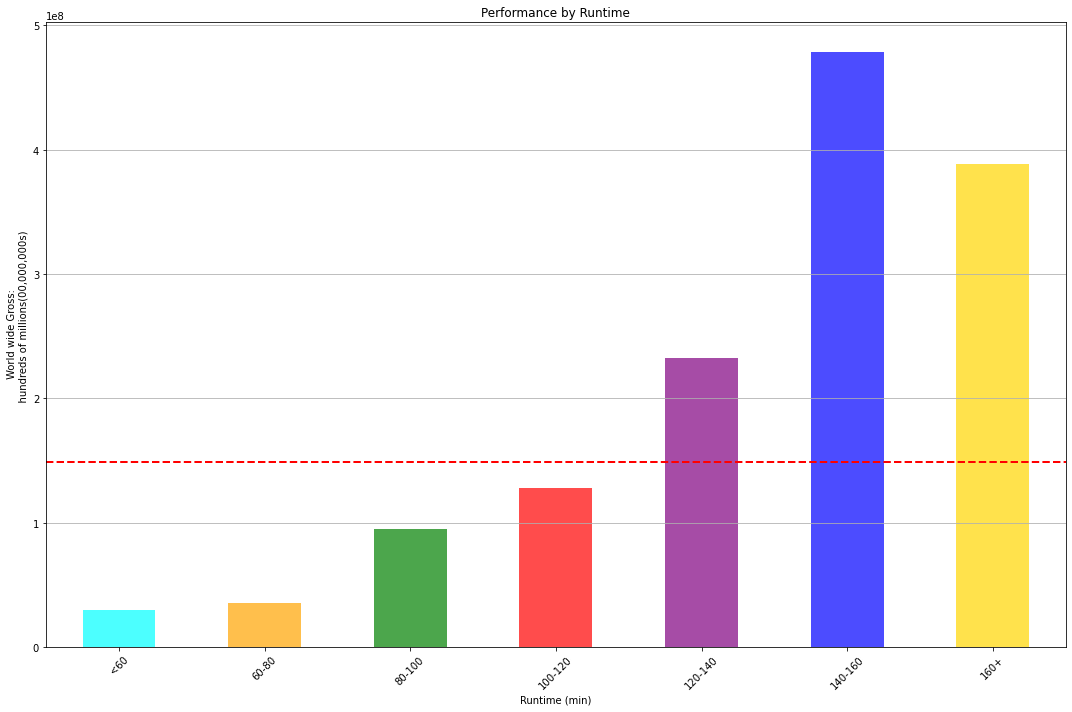

In [75]:
# Plotting

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))


# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 'gold']

ax = runtime_performance['worldwide_gross'].plot(kind='bar', color=colors, alpha=0.7, label='Worldwide Gross')
mean_worldwide_gross = df_movie_stats_and_gross['worldwide_gross'].mean()
ax.axhline(mean_worldwide_gross, color='red', linestyle='--', linewidth=2, label='Mean Worldwide Gross')

plt.title('Performance by Runtime')
plt.xlabel('Runtime (min)')
plt.ylabel(""" World wide Gross:
            hundreds of millions(00,000,000s)""")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Runtime/bar_by_worldwide_gross.png')
plt.show()



                b.   Return on Investement
                


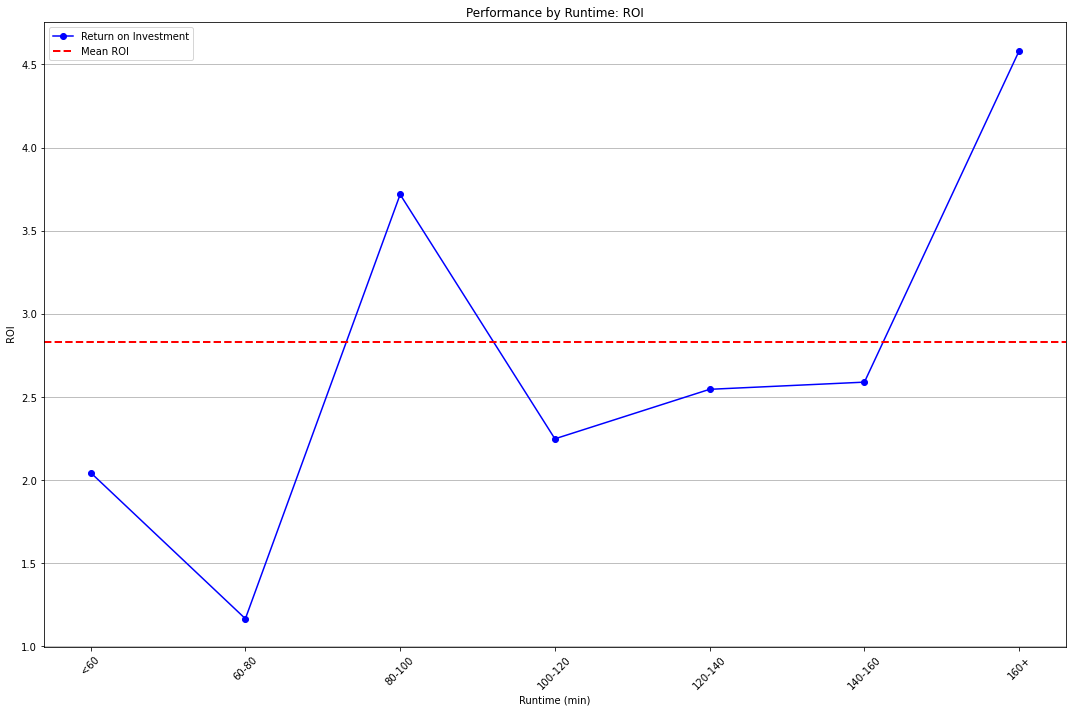

In [76]:

plt.figure(figsize=(15, 10))
ax = runtime_performance['ROI'].plot(kind='line', color='blue', marker='o', label='Return on Investment')

#adding mean line 
mean_roi = df_movie_stats_and_gross['ROI'].mean()
ax.axhline(mean_roi, color='red', linestyle='--', linewidth=2, label='Mean ROI')

plt.title('Performance by Runtime: ROI')
plt.xlabel('Runtime (min)')
plt.ylabel(""" ROI""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Runtime/bar_by_ROI.png')
plt.show()


#  Analysis
#### i.   Worldwide Gross

+   Based on Worldwide Gross, movies with 120 + min have the best performance, with the movies between 140 and 160min doing best. 
+   Conversely movies below 100min have below average grosses, with those below 60min performing worst

#### i.   Return on Investment (ROI)

+   Based on ROI, movies with (80-100) and 160+ min have good performance, with the movies with 160min+ doing best. 
+   Conversely movies between (120-160 min)  have  average ROI's, with those between (0-80min) performing worst                



### (2) Audience Reception:

* We shall plot a bar chart to visualy examine the different performances based on runtime


In [77]:
runtime_performance

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
Runtime Group,,,,,,,,,
<60,2012.666667,37.666667,7.205000,6.333333,6.476654,8.900000e+06,2.988694e+07,2.098694e+07,2.043780
60-80,2013.416667,72.500000,5.276333,6.333333,5.430060,1.764375e+07,3.545061e+07,1.780686e+07,1.164421
80-100,2013.483471,91.725207,10.125603,6.785124,5.798922,2.810290e+07,9.533829e+07,6.723539e+07,3.717386
100-120,2013.689076,108.435294,12.985980,6.897479,6.372189,4.389370e+07,1.276184e+08,8.372466e+07,2.247005
120-140,2014.334764,127.695279,16.268197,7.927039,6.830837,7.130961e+07,2.321744e+08,1.608648e+08,2.544943
140-160,2014.096154,145.961538,21.866904,8.000000,7.116494,1.206769e+08,4.785092e+08,3.578322e+08,2.588128
160+,2014.055556,166.944444,18.396167,9.888889,7.623972,1.021500e+08,3.883900e+08,2.862400e+08,4.582038


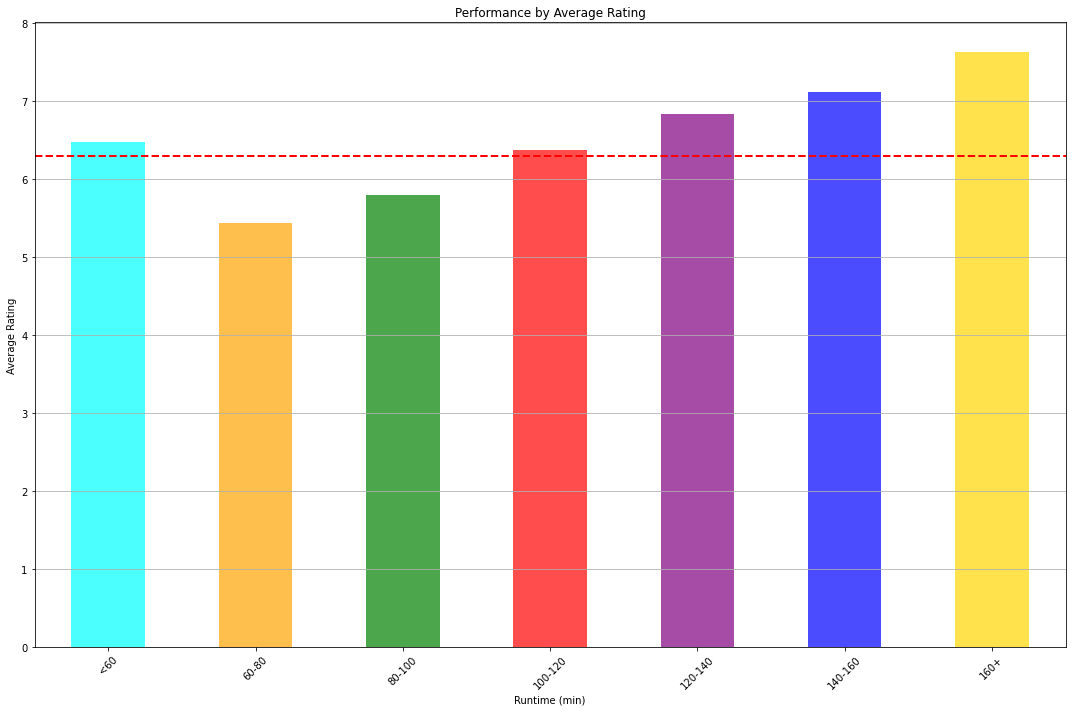

In [78]:
# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 'gold']

plt.figure(figsize=(15, 10))

ax = runtime_performance['average_rating'].plot(kind='bar', color=colors, alpha=0.7,legend= False)
mean_rating = df_movie_stats_and_gross['average_rating'].mean()
ax.axhline(mean_rating, color='red', linestyle='--', linewidth=2, label='Mean rating',)

plt.title('Performance by Average Rating')
plt.xlabel('Runtime (min)')
plt.ylabel("""Average Rating""")
#plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Runtime/bar_by_rating.png')
plt.show()

  #  Analysis


+   Based on Audience Reception, movies with 120 + min have the best performance,
+   Those ranging from 100 -120 min perform avaregaly
+   Conversely movies below 100min generally have below average ratings, with those between 60-80 min performing worst


              

### (3)Popularity and Engagement:



* We shall plot a bar chart to visualy examine the different performances based on runtime 

In [79]:
runtime_performance

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
Runtime Group,,,,,,,,,
<60,2012.666667,37.666667,7.205000,6.333333,6.476654,8.900000e+06,2.988694e+07,2.098694e+07,2.043780
60-80,2013.416667,72.500000,5.276333,6.333333,5.430060,1.764375e+07,3.545061e+07,1.780686e+07,1.164421
80-100,2013.483471,91.725207,10.125603,6.785124,5.798922,2.810290e+07,9.533829e+07,6.723539e+07,3.717386
100-120,2013.689076,108.435294,12.985980,6.897479,6.372189,4.389370e+07,1.276184e+08,8.372466e+07,2.247005
120-140,2014.334764,127.695279,16.268197,7.927039,6.830837,7.130961e+07,2.321744e+08,1.608648e+08,2.544943
140-160,2014.096154,145.961538,21.866904,8.000000,7.116494,1.206769e+08,4.785092e+08,3.578322e+08,2.588128
160+,2014.055556,166.944444,18.396167,9.888889,7.623972,1.021500e+08,3.883900e+08,2.862400e+08,4.582038


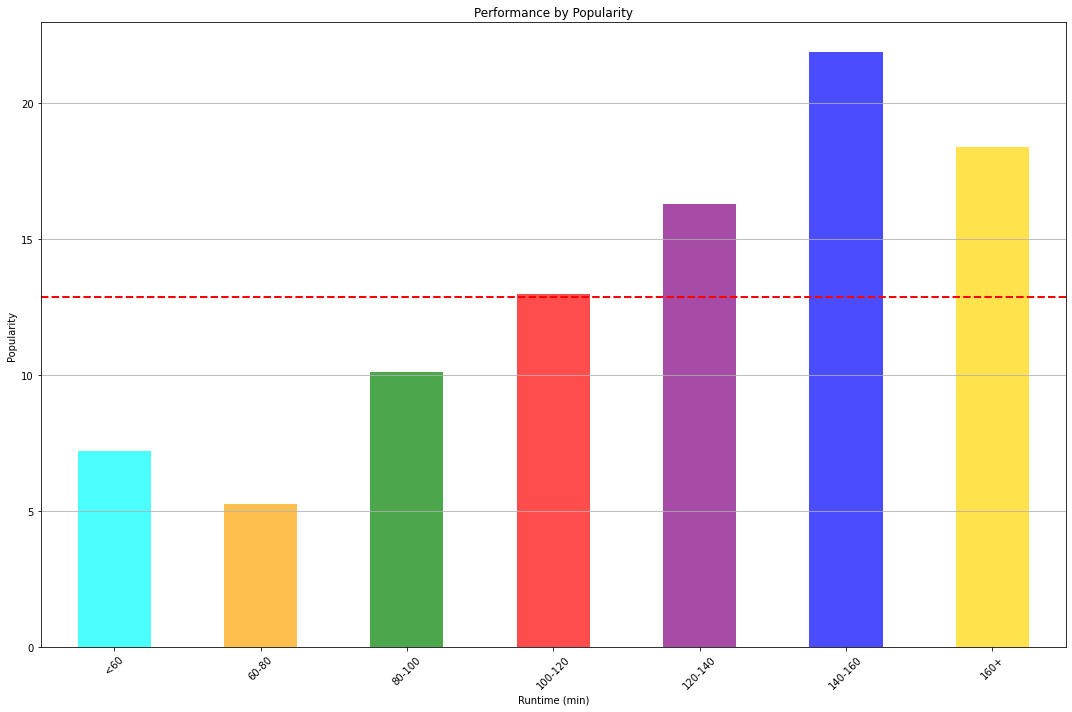

In [80]:
plt.figure(figsize=(15, 10))


# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 'gold']

ax = runtime_performance['popularity'].plot(kind='bar', color=colors, alpha=0.7, label='Popularity')
mean_popularity = df_movie_stats_and_gross['popularity'].mean()
ax.axhline(mean_popularity, color='red', linestyle='--', linewidth=2, label='Mean Popularity')

plt.title('Performance by Popularity')
plt.xlabel('Runtime (min)')
plt.ylabel("""Popularity""")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Runtime/bar_by_popularity.png')
plt.show()


#  Analysis
 


+   Based on Popularity, movies with 120 + min have the best performance,
+   Those ranging from 100 -120 min perform avaregaly
+   Conversely movies below 100min generally have below average popularity ratings, with those between 60-80 min performing worst


# Conclusion

Based on the analysis of runtime, the performance of movies varies significantly across different metrics:

- **Worldwide Gross**: Movies with runtimes of 120+ minutes perform the best, with the 140-160 minute range being the top performers. Movies under 100 minutes generally have below-average grosses, with those under 60 minutes performing the worst.
- **Return on Investment (ROI)**: Movies with runtimes of 80-100 minutes and 160+ minutes show good ROI performance, with 160+ minute movies performing the best. Movies between 120-160 minutes have average ROI, while those under 80 minutes perform the worst.
- **Audience Reception**: Movies with 120+ minutes receive the highest audience ratings. Movies in the 100-120 minute range perform averagely, whereas those under 100 minutes generally receive below-average ratings, with the 60-80 minute range performing the worst.
- **Popularity**: Movies with 120+ minutes are the most popular. Those in the 100-120 minute range have average popularity, while movies under 100 minutes generally have below-average popularity, with the 60-80 minute range performing the worst.

In summary, movies with runtimes of 120+ minutes consistently perform the best across all metrics, with those in the 140-160 minute range leading in worldwide gross. Movies in the 100-120 minute range show average performance, while those under 100 minutes, especially in the 60-80 minute range, generally perform the worst across all metrics.

+ Furthermore, there seems to be a correlation between runtime and general performance as can be deduced from the scatter plot below, that compares runtime with popularity

In [81]:
df_movie_stats_and_gross_copy.head(2)

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120


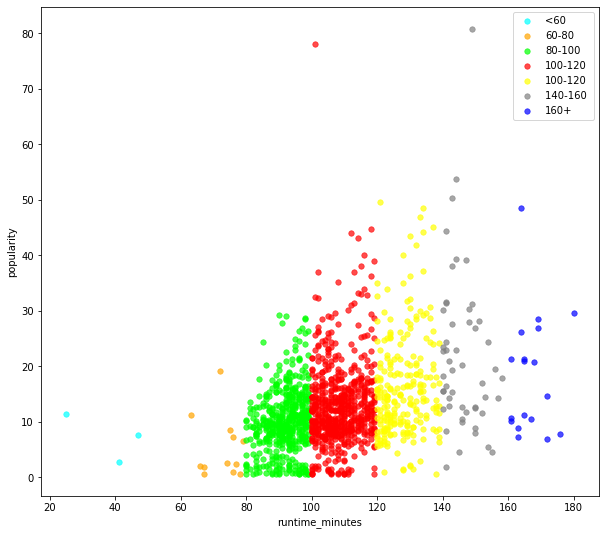

In [82]:

#runtime_labels = ['<60', '60-80', '80-100', '100-120', '120-140', '140-160', '160+']
ax_1 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='<60'].plot.scatter(
                                x= 'runtime_minutes',
                                y = 'popularity',
                                figsize=(10,9),
                                 color='cyan',  # Marker color
                                 edgecolor='cyan',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 legend = True,
                                 label='<60 '
                                    )
ax_2 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='60-80'].plot.scatter(
                                x= 'runtime_minutes', 
                                y = 'popularity',
                                figsize=(10,9),
                                 color='orange',  # Marker color
                                 edgecolor='orange',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label = '60-80')
ax_3 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='80-100'].plot.scatter(
                                x= 'runtime_minutes', 
                                y = 'popularity',
                                figsize=(10,9),
                                 color='lime',  # Marker color
                                 edgecolor='lime',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label='80-100')

ax_4 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='100-120'].plot.scatter(     
                                x= 'runtime_minutes', 
                                y = 'popularity',
                                figsize=(10,9),
                                 color='red',  # Marker color
                                 edgecolor='red',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label='100-120')
ax_5 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='120-140'].plot.scatter(
                                x= 'runtime_minutes', 
                                y = 'popularity',
                                figsize=(10,9),
                                 color='yellow',  # Marker color
                                 edgecolor='yellow',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label='100-120')
ax_6 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='140-160'].plot.scatter(
                                x= 'runtime_minutes', 
                                y = 'popularity',
                                figsize=(10,9),
                                 color='gray',  # Marker color
                                 edgecolor='gray',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label='140-160 ')



ax_7 = df_movie_stats_and_gross_copy[df_movie_stats_and_gross_copy['Runtime Group']=='160+'].plot.scatter(
                                x= 'runtime_minutes',
                                 y = 'popularity',
                                figsize=(10,9),
                                 color='blue',  # Marker color
                                 edgecolor='blue',  # Marker edge color
                                 s=30,  # Marker size
                                 alpha=0.7,  # Marker transparency
                                 linewidth=0.7, # Width of the edges
                                 #grid=True,
                                 ax= ax_1,
                                 legend = True,
                                 label='160+'
                                    )



plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Runtime/corr_runtime_popularity.png')
plt.show()

# B. Analysis of  Performance by Month of Release 


In [83]:
df_movie_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12161 entries, 0 to 12160
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              12161 non-null  object 
 1   release_year       12161 non-null  int64  
 2   runtime_minutes    11957 non-null  float64
 3   genres             12128 non-null  object 
 4   original_language  12161 non-null  object 
 5   popularity         12161 non-null  float64
 6   release_month      12161 non-null  int64  
 7   average_rating     12161 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 855.1+ KB


In [84]:
df_movie_stats_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              1402 non-null   object  
 1   release_year       1402 non-null   int64   
 2   runtime_minutes    1397 non-null   float64 
 3   genres             1400 non-null   object  
 4   original_language  1402 non-null   object  
 5   popularity         1402 non-null   float64 
 6   release_month      1402 non-null   int64   
 7   average_rating     1402 non-null   float64 
 8   production_budget  1402 non-null   int64   
 9   worldwide_gross    1402 non-null   int64   
 10  profit             1402 non-null   int64   
 11  ROI                1402 non-null   float64 
 12  Runtime Group      1397 non-null   category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 144.1+ KB


In [85]:
#There are no null rows for the column release_month so we are good to go
# first we make copies so as not to alter original dataframes
df_movie_stats_and_gross_copy = df_movie_stats_and_gross


In [86]:
#creating the two dataframes for analysis
release_month_performance_financial = df_movie_stats_and_gross_copy.groupby('release_month').mean()
release_month_performance_rating = df_movie_stats.groupby('release_month').mean()

In [87]:
release_month_performance_financial.head(12)

,release_year,runtime_minutes,popularity,average_rating,production_budget,worldwide_gross,profit,ROI
release_month,,,,,,,,
1,2013.486842,101.210526,10.550382,5.719203,3.421447e+07,9.629870e+07,6.208423e+07,3.555875
2,2013.903614,106.421687,13.066133,5.952819,4.355964e+07,1.411600e+08,9.760034e+07,2.862946
3,2013.952381,104.856000,12.000230,6.120400,5.324472e+07,1.538687e+08,1.006240e+08,1.833745
4,2013.610526,106.319149,11.104600,6.204161,4.026816e+07,1.480729e+08,1.078048e+08,1.960534
5,2013.618557,107.350515,15.361505,6.115018,7.583247e+07,2.450204e+08,1.691879e+08,2.585412
6,2013.964912,107.298246,13.615026,6.338809,6.410712e+07,2.413936e+08,1.772865e+08,2.840429
7,2013.811966,106.880342,14.057863,6.224636,5.739124e+07,1.989584e+08,1.415671e+08,7.028746
8,2013.642857,104.491071,12.388134,6.250255,3.701625e+07,9.852288e+07,6.150663e+07,2.213524
9,2013.475862,105.262069,11.221276,6.300399,2.524440e+07,6.652465e+07,4.128025e+07,1.642499


In [88]:
release_month_performance_rating.head(12)

,release_year,runtime_minutes,popularity,average_rating
release_month,,,,
1,2013.690951,91.669014,2.485816,5.662317
2,2014.323374,95.283154,4.343095,5.589558
3,2014.493409,93.927342,3.674793,5.907541
4,2014.477157,92.824849,3.148430,5.971974
5,2014.354463,93.700394,4.353379,5.646373
6,2014.140887,93.489960,3.997612,5.810555
7,2014.152448,96.207092,5.089295,5.690894
8,2014.355392,94.908302,4.947203,5.675102
9,2014.269391,95.618399,4.329812,5.859025


+ On inspection, of the 2 datasets, I have decided to use the dataframe : df_movie_stats_and_gross_copy since the trends are more clearly depicted

In [89]:
release_month_performance = df_movie_stats_and_gross_copy.groupby('release_month').mean()

## (1) Financial performance
 
#### i.  Worldwide Gross

In [90]:
release_month_performance

,release_year,runtime_minutes,popularity,average_rating,production_budget,worldwide_gross,profit,ROI
release_month,,,,,,,,
1,2013.486842,101.210526,10.550382,5.719203,3.421447e+07,9.629870e+07,6.208423e+07,3.555875
2,2013.903614,106.421687,13.066133,5.952819,4.355964e+07,1.411600e+08,9.760034e+07,2.862946
3,2013.952381,104.856000,12.000230,6.120400,5.324472e+07,1.538687e+08,1.006240e+08,1.833745
4,2013.610526,106.319149,11.104600,6.204161,4.026816e+07,1.480729e+08,1.078048e+08,1.960534
5,2013.618557,107.350515,15.361505,6.115018,7.583247e+07,2.450204e+08,1.691879e+08,2.585412
6,2013.964912,107.298246,13.615026,6.338809,6.410712e+07,2.413936e+08,1.772865e+08,2.840429
7,2013.811966,106.880342,14.057863,6.224636,5.739124e+07,1.989584e+08,1.415671e+08,7.028746
8,2013.642857,104.491071,12.388134,6.250255,3.701625e+07,9.852288e+07,6.150663e+07,2.213524
9,2013.475862,105.262069,11.221276,6.300399,2.524440e+07,6.652465e+07,4.128025e+07,1.642499


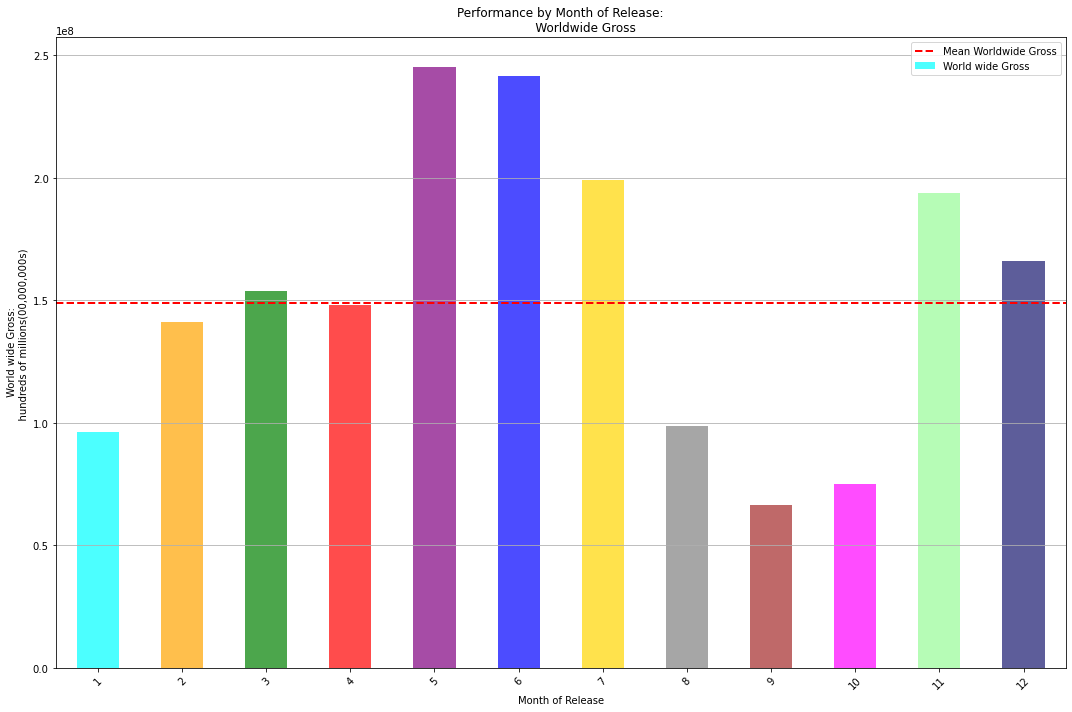

In [91]:
# we shall use a bar graph to plot this
# Plotting


plt.figure(figsize=(15, 10))


# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 
          'gold','gray','brown','fuchsia','palegreen','midnightblue']

ax = release_month_performance['worldwide_gross'].plot(kind='bar', 
                                                       color=colors, alpha=0.7, label='World wide Gross')

mean_worldwide_gross = df_movie_stats_and_gross['worldwide_gross'].mean()
ax.axhline(mean_worldwide_gross, color='red', linestyle='--', linewidth=2, label='Mean Worldwide Gross')


plt.title("""Performance by Month of Release:
             Worldwide Gross""")
plt.xlabel('Month of Release')
plt.ylabel(""" World wide Gross:
            hundreds of millions(00,000,000s)""")
plt.legend()

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Release_month/bar_by_worldwide_gross.png')
plt.show()


+ **As can be seen, based on world Gross, movies released halfway in the year and towards the end of the year have higher grosses, while those released between September and October perform worst**

#### i.  Return on Investement (ROI)

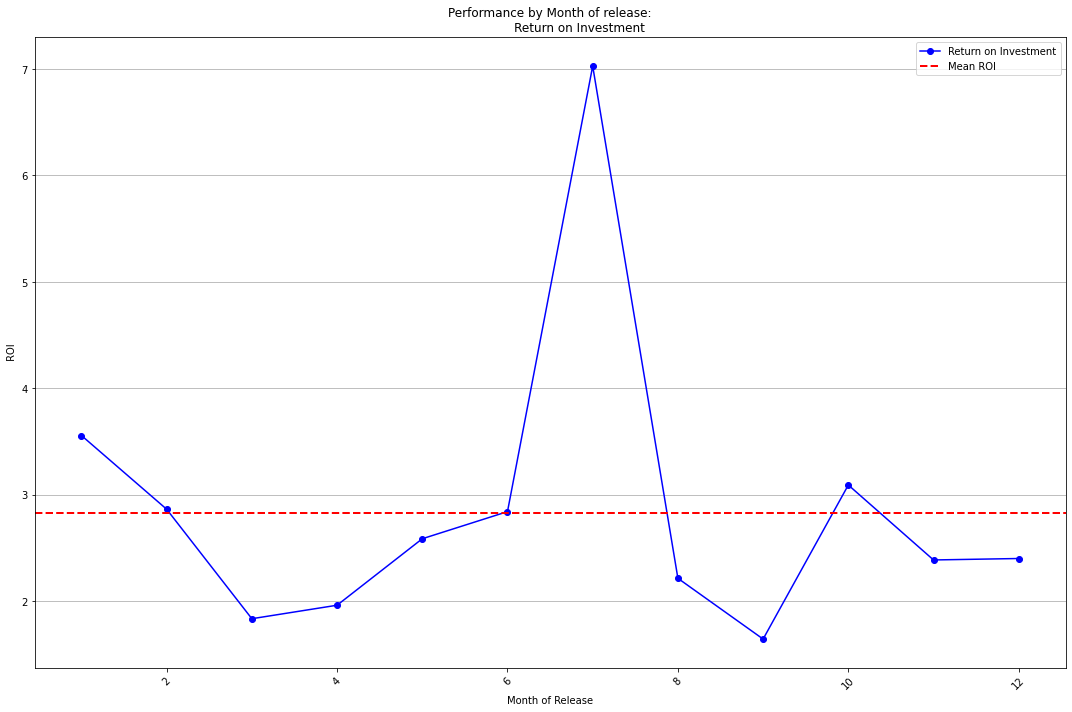

In [92]:

plt.figure(figsize=(15, 10))
ax = release_month_performance['ROI'].plot(kind='line', color='blue', marker='o', label='Return on Investment')

#adding mean line 
mean_roi = df_movie_stats_and_gross['ROI'].mean()
ax.axhline(mean_roi, color='red', linestyle='--', linewidth=2, label='Mean ROI')

plt.title("""Performance by Month of release:
               Return on Investment""")
plt.xlabel('Month of Release')
plt.ylabel(""" ROI""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Release_month/bar_by_ROI.png')
plt.show()


+ **As can be seen, based on ROI, movies released halfway in the year have considerably higher ROI's as compared to other months, Those at the year end have above average ROI's while those in between those two periods perform worst**

## (2) Audience Reception

In [93]:
release_month_performance

,release_year,runtime_minutes,popularity,average_rating,production_budget,worldwide_gross,profit,ROI
release_month,,,,,,,,
1,2013.486842,101.210526,10.550382,5.719203,3.421447e+07,9.629870e+07,6.208423e+07,3.555875
2,2013.903614,106.421687,13.066133,5.952819,4.355964e+07,1.411600e+08,9.760034e+07,2.862946
3,2013.952381,104.856000,12.000230,6.120400,5.324472e+07,1.538687e+08,1.006240e+08,1.833745
4,2013.610526,106.319149,11.104600,6.204161,4.026816e+07,1.480729e+08,1.078048e+08,1.960534
5,2013.618557,107.350515,15.361505,6.115018,7.583247e+07,2.450204e+08,1.691879e+08,2.585412
6,2013.964912,107.298246,13.615026,6.338809,6.410712e+07,2.413936e+08,1.772865e+08,2.840429
7,2013.811966,106.880342,14.057863,6.224636,5.739124e+07,1.989584e+08,1.415671e+08,7.028746
8,2013.642857,104.491071,12.388134,6.250255,3.701625e+07,9.852288e+07,6.150663e+07,2.213524
9,2013.475862,105.262069,11.221276,6.300399,2.524440e+07,6.652465e+07,4.128025e+07,1.642499


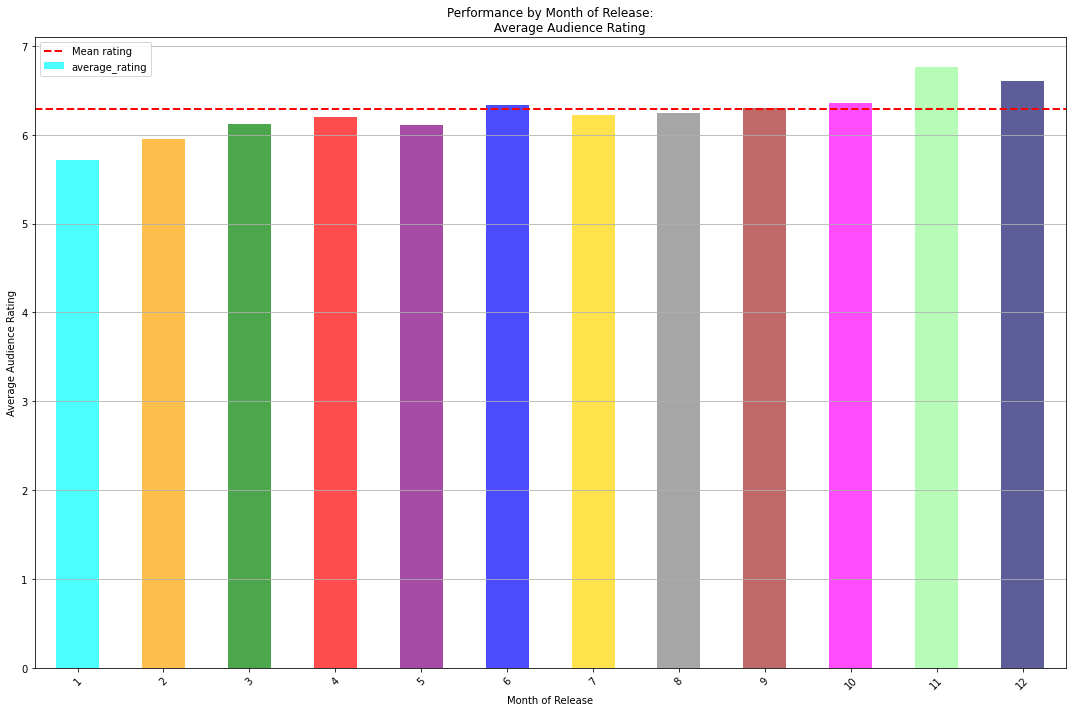

In [94]:
# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 
          'gold','gray','brown','fuchsia','palegreen','midnightblue']

plt.figure(figsize=(15, 10))

ax = release_month_performance['average_rating'].plot(kind='bar', color=colors, alpha=0.7,legend= False)
mean_rating = df_movie_stats_and_gross['average_rating'].mean()
ax.axhline(mean_rating, color='red', linestyle='--', linewidth=2, label='Mean rating',)

plt.title("""Performance by Month of Release:
          Average Audience Rating""")
plt.xlabel('Month of Release')
plt.ylabel("""Average Audience Rating""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Release_month/bar_by_rating.png')
plt.show()

+ **As can be seen the performance based on audience rating is not very clear, However, Months 6 , and 10-12 stand out as having above average audience rating compared to the other months**

### (3) Popularity and Engagement

In [95]:
release_month_performance

,release_year,runtime_minutes,popularity,average_rating,production_budget,worldwide_gross,profit,ROI
release_month,,,,,,,,
1,2013.486842,101.210526,10.550382,5.719203,3.421447e+07,9.629870e+07,6.208423e+07,3.555875
2,2013.903614,106.421687,13.066133,5.952819,4.355964e+07,1.411600e+08,9.760034e+07,2.862946
3,2013.952381,104.856000,12.000230,6.120400,5.324472e+07,1.538687e+08,1.006240e+08,1.833745
4,2013.610526,106.319149,11.104600,6.204161,4.026816e+07,1.480729e+08,1.078048e+08,1.960534
5,2013.618557,107.350515,15.361505,6.115018,7.583247e+07,2.450204e+08,1.691879e+08,2.585412
6,2013.964912,107.298246,13.615026,6.338809,6.410712e+07,2.413936e+08,1.772865e+08,2.840429
7,2013.811966,106.880342,14.057863,6.224636,5.739124e+07,1.989584e+08,1.415671e+08,7.028746
8,2013.642857,104.491071,12.388134,6.250255,3.701625e+07,9.852288e+07,6.150663e+07,2.213524
9,2013.475862,105.262069,11.221276,6.300399,2.524440e+07,6.652465e+07,4.128025e+07,1.642499


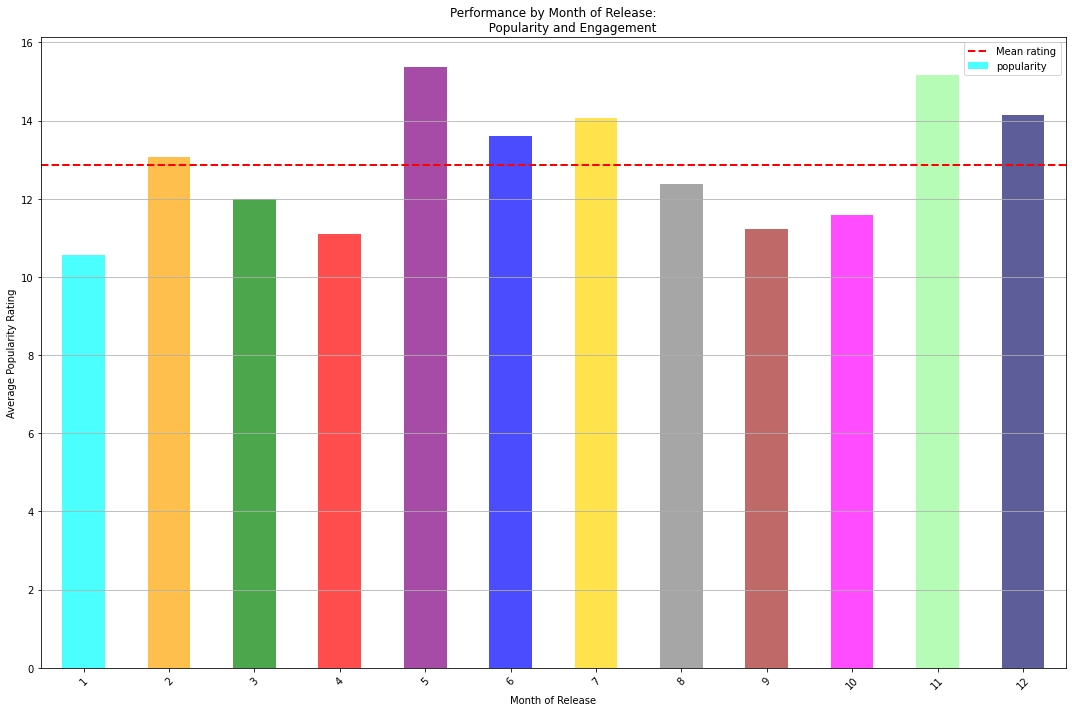

In [96]:
# Plotting with custom colors for each group
colors = ['cyan', 'orange', 'green', 'red', 'purple', 'blue', 
          'gold','gray','brown','fuchsia','palegreen','midnightblue']

plt.figure(figsize=(15, 10))

ax = release_month_performance['popularity'].plot(kind='bar', color=colors, alpha=0.7,legend= False)
mean_rating = df_movie_stats_and_gross['popularity'].mean()
ax.axhline(mean_rating, color='red', linestyle='--', linewidth=2, label='Mean rating',)

plt.title("""Performance by Month of Release:
          Popularity and Engagement""")
plt.xlabel('Month of Release')
plt.ylabel("""Average Popularity Rating""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Release_month/bar_by_popularity.png')
plt.show()

+ **As can be seen the performance based on popularity rating is not very clear, However, Months 5-7 , and 11 stand out as having above average popularity ratings compared to the other months**

# Analysis of Movie Performance by Month of Release

### Worldwide Gross and ROI
- **High Performers:** May, June, and December stand out with the highest gross and ROIs, indicating exceptional financial success.
- **Moderate Performers:** April and November show moderate performance, while March and July hover around the average.
- **Low Performers:** January, October, February, August, and September have below-average gross, with September being the worst.

### Average Audience Rating
- **High Performers:** June and December receive the highest audience ratings, followed by November.
- **Consistent Performers:** January to May and July to October maintain stable audience ratings close to the mean.

# Conclusion
**Best Months for Release:** May, June, and December have both high financial performance s and audience ratings, making them ideal for releases.

**Worst Months for Release:** February, August, and September perform poorly in both financial performance and audience ratings.

**Consistent Audience Reception:** Months from January to May and July to October maintain stable audience ratings despite varying financial performance.

+ **Overall, releasing movies in May, June, or December maximizes financial success and audience reception, while February, August, and September should be avoided.**


# C. Analysis of Performance by Genre:


In [97]:
df_movie_stats_and_gross_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              1402 non-null   object  
 1   release_year       1402 non-null   int64   
 2   runtime_minutes    1397 non-null   float64 
 3   genres             1400 non-null   object  
 4   original_language  1402 non-null   object  
 5   popularity         1402 non-null   float64 
 6   release_month      1402 non-null   int64   
 7   average_rating     1402 non-null   float64 
 8   production_budget  1402 non-null   int64   
 9   worldwide_gross    1402 non-null   int64   
 10  profit             1402 non-null   int64   
 11  ROI                1402 non-null   float64 
 12  Runtime Group      1397 non-null   category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 144.1+ KB


In [98]:

df_movie_stats_copy= df_movie_stats
df_movie_stats_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12161 entries, 0 to 12160
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              12161 non-null  object 
 1   release_year       12161 non-null  int64  
 2   runtime_minutes    11957 non-null  float64
 3   genres             12128 non-null  object 
 4   original_language  12161 non-null  object 
 5   popularity         12161 non-null  float64
 6   release_month      12161 non-null  int64  
 7   average_rating     12161 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 855.1+ KB


In [99]:
#let us inspect the genre column

In [100]:
df_movie_stats_copy['genres'].isna().sum()

33

In [101]:
df_movie_stats_and_gross_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              1402 non-null   object  
 1   release_year       1402 non-null   int64   
 2   runtime_minutes    1397 non-null   float64 
 3   genres             1400 non-null   object  
 4   original_language  1402 non-null   object  
 5   popularity         1402 non-null   float64 
 6   release_month      1402 non-null   int64   
 7   average_rating     1402 non-null   float64 
 8   production_budget  1402 non-null   int64   
 9   worldwide_gross    1402 non-null   int64   
 10  profit             1402 non-null   int64   
 11  ROI                1402 non-null   float64 
 12  Runtime Group      1397 non-null   category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 144.1+ KB


In [102]:
df_movie_stats_and_gross_copy['genres'].isna().sum()

2

In [103]:
# dropping nans on genres since they are a negligible fraction of our data sets
df_movie_stats_and_gross_copy.dropna(subset = ['genres'], inplace = True)
df_movie_stats_copy.dropna(subset = ['genres'], inplace = True)

In [104]:
df_movie_stats_and_gross_copy.head()

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
2,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",en,20.709,6,6.989840,215000000,1648854864,1433854864,6.669092,120-140
3,The Rum Diary,2011,119.0,"Comedy,Drama",en,12.011,10,6.196584,45000000,21544732,-23455268,-0.521228,100-120
4,The Three Stooges,2012,92.0,"Comedy,Family",en,9.358,4,5.100000,30000000,54052249,24052249,0.801742,80-100


In [105]:
df_movie_stats

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,Drama,en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,Drama,en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",en,0.877,8,5.908871
3,Wazir,2016,103.0,"Action,Crime,Drama",hi,3.881,1,7.097960
4,In My Sleep,2010,104.0,"Drama,Mystery,Thriller",en,1.795,4,5.498952
...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"Drama,Mystery,Sci-Fi",en,12.282,12,7.293787
12157,Reel Rock 13,2018,115.0,"Documentary,Sport",en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,en,4.304,11,7.211017


In [106]:
df_movie_stats_copy = df_movie_stats
df_movie_stats_and_gross_copy = df_movie_stats_and_gross
df_movie_stats_and_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1401
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              1400 non-null   object  
 1   release_year       1400 non-null   int64   
 2   runtime_minutes    1397 non-null   float64 
 3   genres             1400 non-null   object  
 4   original_language  1400 non-null   object  
 5   popularity         1400 non-null   float64 
 6   release_month      1400 non-null   int64   
 7   average_rating     1400 non-null   float64 
 8   production_budget  1400 non-null   int64   
 9   worldwide_gross    1400 non-null   int64   
 10  profit             1400 non-null   int64   
 11  ROI                1400 non-null   float64 
 12  Runtime Group      1397 non-null   category
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 143.9+ KB


In [107]:
#Now we explode the genres so as to get the individual genres
#first we transform them to lists

df_movie_stats_copy = df_movie_stats
df_movie_stats_and_gross_copy = df_movie_stats_and_gross


In [108]:
df_movie_stats_and_gross_copy
#df_movie_stats_copy= df_movie_stats
#df_movie_stats_copy['genres'] = df_movie_stats_copy['genres'].str.split(',')
df_movie_stats_copy ['genres'] = df_movie_stats_copy['genres'].str.split(',')

In [109]:
#df_movie_stats_copy.explode('genres')
df_movie_stats_copy_1 = df_movie_stats
df_movie_stats_copy_1.explode('genres')






,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,Drama,en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,Drama,en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,Biography,en,0.877,8,5.908871
2,Return to Babylon,2013,75.0,Comedy,en,0.877,8,5.908871
2,Return to Babylon,2013,75.0,Drama,en,0.877,8,5.908871
...,...,...,...,...,...,...,...,...
12157,Reel Rock 13,2018,115.0,Documentary,en,0.699,11,8.259091
12157,Reel Rock 13,2018,115.0,Sport,en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,en,4.304,11,7.211017


In [110]:

df_movie_stats_and_gross_copy['genres'] = df_movie_stats_and_gross_copy['genres'].str.split(',')



In [111]:
df_movie_stats_and_gross

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
2,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",en,20.709,6,6.989840,215000000,1648854864,1433854864,6.669092,120-140
3,The Rum Diary,2011,119.0,"[Comedy, Drama]",en,12.011,10,6.196584,45000000,21544732,-23455268,-0.521228,100-120
4,The Three Stooges,2012,92.0,"[Comedy, Family]",en,9.358,4,5.100000,30000000,54052249,24052249,0.801742,80-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,The Great Wall,2017,72.0,[Documentary],en,19.144,2,5.806002,150000000,334486852,184486852,1.229912,60-80
1398,Hereditary,2018,127.0,"[Drama, Horror, Mystery]",en,26.185,6,7.295149,10000000,70133905,60133905,6.013390,120-140
1399,The Mule,2018,116.0,"[Crime, Drama, Thriller]",en,33.830,12,7.084301,50000000,170857676,120857676,2.417154,100-120
1400,Teefa in Trouble,2018,155.0,"[Action, Comedy, Crime]",ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160


In [112]:
df_movie_stats_copy
#df["col"] = df["col"].values.reshape(-1, 1).tolist()

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,[Drama],en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,[Drama],en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,"[Biography, Comedy, Drama]",en,0.877,8,5.908871
3,Wazir,2016,103.0,"[Action, Crime, Drama]",hi,3.881,1,7.097960
4,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",en,1.795,4,5.498952
...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"[Drama, Mystery, Sci-Fi]",en,12.282,12,7.293787
12157,Reel Rock 13,2018,115.0,"[Documentary, Sport]",en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,[Documentary],en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,[Comedy],en,4.304,11,7.211017


In [113]:
df_movie_stats

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,[Drama],en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,[Drama],en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,"[Biography, Comedy, Drama]",en,0.877,8,5.908871
3,Wazir,2016,103.0,"[Action, Crime, Drama]",hi,3.881,1,7.097960
4,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",en,1.795,4,5.498952
...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"[Drama, Mystery, Sci-Fi]",en,12.282,12,7.293787
12157,Reel Rock 13,2018,115.0,"[Documentary, Sport]",en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,[Documentary],en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,[Comedy],en,4.304,11,7.211017


In [114]:
df_movie_stats_copy

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,[Drama],en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,[Drama],en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,"[Biography, Comedy, Drama]",en,0.877,8,5.908871
3,Wazir,2016,103.0,"[Action, Crime, Drama]",hi,3.881,1,7.097960
4,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",en,1.795,4,5.498952
...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"[Drama, Mystery, Sci-Fi]",en,12.282,12,7.293787
12157,Reel Rock 13,2018,115.0,"[Documentary, Sport]",en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,[Documentary],en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,[Comedy],en,4.304,11,7.211017


In [115]:
df_movie_stats_and_gross_copy

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
2,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",en,20.709,6,6.989840,215000000,1648854864,1433854864,6.669092,120-140
3,The Rum Diary,2011,119.0,"[Comedy, Drama]",en,12.011,10,6.196584,45000000,21544732,-23455268,-0.521228,100-120
4,The Three Stooges,2012,92.0,"[Comedy, Family]",en,9.358,4,5.100000,30000000,54052249,24052249,0.801742,80-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,The Great Wall,2017,72.0,[Documentary],en,19.144,2,5.806002,150000000,334486852,184486852,1.229912,60-80
1398,Hereditary,2018,127.0,"[Drama, Horror, Mystery]",en,26.185,6,7.295149,10000000,70133905,60133905,6.013390,120-140
1399,The Mule,2018,116.0,"[Crime, Drama, Thriller]",en,33.830,12,7.084301,50000000,170857676,120857676,2.417154,100-120
1400,Teefa in Trouble,2018,155.0,"[Action, Comedy, Crime]",ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160


In [116]:
# now 
df_movie_stats_and_gross_copy

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
2,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",en,20.709,6,6.989840,215000000,1648854864,1433854864,6.669092,120-140
3,The Rum Diary,2011,119.0,"[Comedy, Drama]",en,12.011,10,6.196584,45000000,21544732,-23455268,-0.521228,100-120
4,The Three Stooges,2012,92.0,"[Comedy, Family]",en,9.358,4,5.100000,30000000,54052249,24052249,0.801742,80-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,The Great Wall,2017,72.0,[Documentary],en,19.144,2,5.806002,150000000,334486852,184486852,1.229912,60-80
1398,Hereditary,2018,127.0,"[Drama, Horror, Mystery]",en,26.185,6,7.295149,10000000,70133905,60133905,6.013390,120-140
1399,The Mule,2018,116.0,"[Crime, Drama, Thriller]",en,33.830,12,7.084301,50000000,170857676,120857676,2.417154,100-120
1400,Teefa in Trouble,2018,155.0,"[Action, Comedy, Crime]",ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160


In [117]:
df_movie_stats_copy_1

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,[Drama],en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,[Drama],en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,"[Biography, Comedy, Drama]",en,0.877,8,5.908871
3,Wazir,2016,103.0,"[Action, Crime, Drama]",hi,3.881,1,7.097960
4,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",en,1.795,4,5.498952
...,...,...,...,...,...,...,...,...
12156,Black Mirror: Bandersnatch,2018,90.0,"[Drama, Mystery, Sci-Fi]",en,12.282,12,7.293787
12157,Reel Rock 13,2018,115.0,"[Documentary, Sport]",en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,[Documentary],en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,[Comedy],en,4.304,11,7.211017


In [118]:
df_movie_stats_and_gross_copy_exploded = df_movie_stats_and_gross_copy.explode('genres')

In [119]:
df_movie_stats_and_gross_copy_exploded

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI,Runtime Group
0,The Secret Life of Walter Mitty,2013,114.0,Adventure,en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
0,The Secret Life of Walter Mitty,2013,114.0,Comedy,en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
0,The Secret Life of Walter Mitty,2013,114.0,Drama,en,10.743,12,7.296531,91000000,187861183,96861183,1.064409,100-120
1,A Walk Among the Tombstones,2014,114.0,Action,en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
1,A Walk Among the Tombstones,2014,114.0,Crime,en,19.373,9,6.496845,28000000,62108587,34108587,1.218164,100-120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,The Mule,2018,116.0,Thriller,en,33.830,12,7.084301,50000000,170857676,120857676,2.417154,100-120
1400,Teefa in Trouble,2018,155.0,Action,ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160
1400,Teefa in Trouble,2018,155.0,Comedy,ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160
1400,Teefa in Trouble,2018,155.0,Crime,ur,4.486,7,7.400804,1500000,98806,-1401194,-0.934129,140-160


In [120]:
df_movie_stats_copy_exploded = df_movie_stats_copy.explode('genres')

In [121]:
df_movie_stats_copy_exploded = df_movie_stats_copy.explode('genres')


In [122]:
df_movie_stats_copy_exploded

,title,release_year,runtime_minutes,genres,original_language,popularity,release_month,average_rating
0,The Other Side of the Wind,2018,122.0,Drama,en,9.800,11,6.901397
1,Heaven & Hell,2018,104.0,Drama,en,0.600,11,4.094595
2,Return to Babylon,2013,75.0,Biography,en,0.877,8,5.908871
2,Return to Babylon,2013,75.0,Comedy,en,0.877,8,5.908871
2,Return to Babylon,2013,75.0,Drama,en,0.877,8,5.908871
...,...,...,...,...,...,...,...,...
12157,Reel Rock 13,2018,115.0,Documentary,en,0.699,11,8.259091
12157,Reel Rock 13,2018,115.0,Sport,en,0.699,11,8.259091
12158,A Haunting on Finn Road: The Devil's Grove,2018,129.0,Documentary,en,0.697,10,5.667692
12159,John Leguizamo's Latin History for Morons,2018,NaN,Comedy,en,4.304,11,7.211017


In [123]:
df_movie_stats_copy_exploded['genres'].unique()

array(['Drama', 'Biography', 'Comedy', 'Action', 'Crime', 'Mystery',
       'Thriller', 'Adventure', 'Animation', 'Romance', 'Sci-Fi',
       'Family', 'History', 'Horror', 'Music', 'Fantasy', 'Sport',
       'Documentary', 'War', 'Musical', 'Western', 'News', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [124]:
genre_performance_financial= df_movie_stats_and_gross_copy_exploded.groupby('genres').mean()
genre_performance_rating= df_movie_stats_copy_exploded.groupby('genres').mean()

In [125]:
genre_performance_financial

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
genres,,,,,,,,,
Action,2013.959811,112.144208,16.857520,6.553191,6.251254,8.017840e+07,2.463172e+08,1.661388e+08,1.676571
Adventure,2014.057751,111.492401,18.404726,6.924012,6.454148,1.083261e+08,3.646504e+08,2.563243e+08,2.189878
Animation,2014.000000,94.810526,15.721789,7.105263,6.581967,9.885789e+07,3.914675e+08,2.926096e+08,2.805243
Biography,2014.696721,119.352459,12.256762,8.877049,7.043626,2.710057e+07,8.573504e+07,5.863447e+07,2.585903
Comedy,2013.530526,102.185654,12.039423,6.966316,6.202482,4.164146e+07,1.403957e+08,9.875420e+07,2.236735
Crime,2013.893805,109.566372,12.996588,7.194690,6.327134,3.286869e+07,8.320384e+07,5.033514e+07,1.221824
Documentary,2013.111111,86.807692,5.710630,7.111111,6.628031,1.006944e+07,3.191964e+07,2.185020e+07,1.936907
Drama,2013.740849,111.500000,11.295385,7.628111,6.553903,2.773841e+07,7.639294e+07,4.865453e+07,2.245059
Family,2013.100000,105.266667,12.272233,7.333333,6.092620,6.727222e+07,2.023973e+08,1.351251e+08,1.628341


In [126]:
genre_performance_rating

,release_year,runtime_minutes,popularity,release_month,average_rating
genres,,,,,
Action,2014.283413,101.880651,7.650334,6.776253,5.412666
Adult,2015.000000,120.000000,0.793000,9.000000,2.003759
Adventure,2014.365953,99.356486,9.326691,6.805301,5.819770
Animation,2014.406832,87.476341,8.327186,7.447205,6.226978
Biography,2014.215969,99.507227,4.513047,6.833770,6.993802
Comedy,2013.990588,94.592593,4.691547,6.628571,5.690394
Crime,2014.304462,100.503100,6.056521,6.955381,5.773848
Documentary,2014.170021,87.550926,1.589390,6.120329,7.061864
Drama,2014.131600,99.147849,4.432194,6.818800,5.991853


We shall use both data sets, df_movie_stats is a much larger data set and shows the trends for popularity and audience reception clearly, while df_movie_stats_and_gross contains financial info

## (a) Financial performance
### i. Worldwide Gross

In [127]:
len(df_movie_stats_and_gross_copy_exploded['genres'].unique())

21

In [128]:
genre_performance_financial

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
genres,,,,,,,,,
Action,2013.959811,112.144208,16.857520,6.553191,6.251254,8.017840e+07,2.463172e+08,1.661388e+08,1.676571
Adventure,2014.057751,111.492401,18.404726,6.924012,6.454148,1.083261e+08,3.646504e+08,2.563243e+08,2.189878
Animation,2014.000000,94.810526,15.721789,7.105263,6.581967,9.885789e+07,3.914675e+08,2.926096e+08,2.805243
Biography,2014.696721,119.352459,12.256762,8.877049,7.043626,2.710057e+07,8.573504e+07,5.863447e+07,2.585903
Comedy,2013.530526,102.185654,12.039423,6.966316,6.202482,4.164146e+07,1.403957e+08,9.875420e+07,2.236735
Crime,2013.893805,109.566372,12.996588,7.194690,6.327134,3.286869e+07,8.320384e+07,5.033514e+07,1.221824
Documentary,2013.111111,86.807692,5.710630,7.111111,6.628031,1.006944e+07,3.191964e+07,2.185020e+07,1.936907
Drama,2013.740849,111.500000,11.295385,7.628111,6.553903,2.773841e+07,7.639294e+07,4.865453e+07,2.245059
Family,2013.100000,105.266667,12.272233,7.333333,6.092620,6.727222e+07,2.023973e+08,1.351251e+08,1.628341


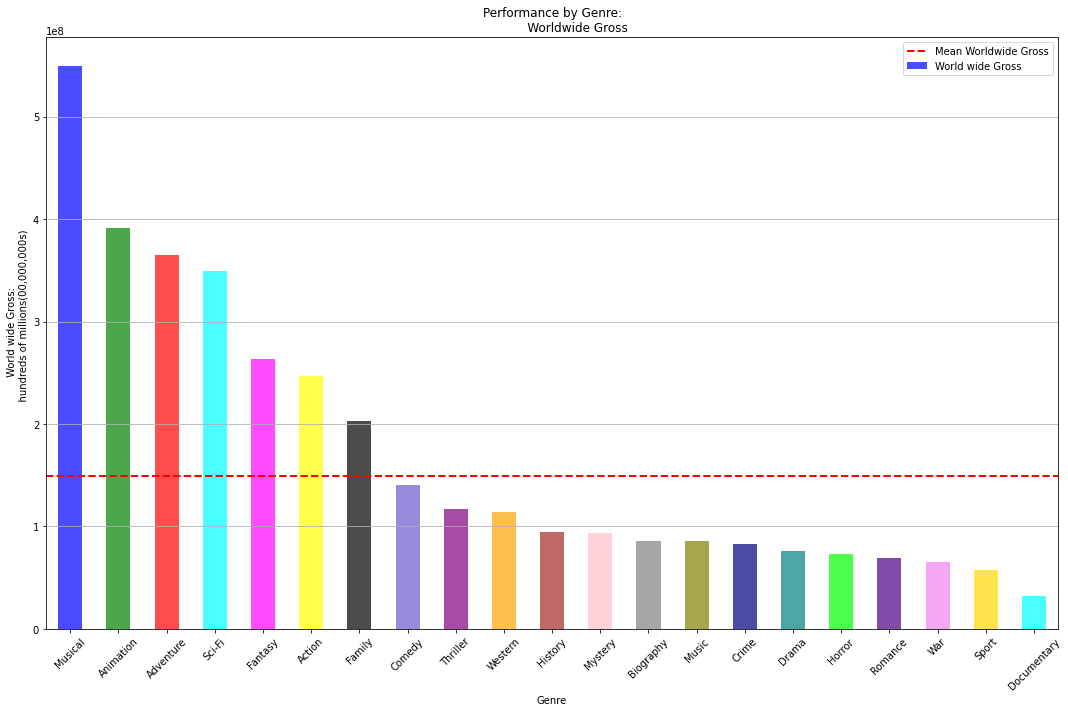

In [129]:
# we shall use a bar graph to plot this
# Plotting


plt.figure(figsize=(15, 10))


# Plotting with custom colors for each group
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'slateblue', 
    'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal', 
    'lime', 'indigo', 'violet', 'gold', 'aqua'
]

genre_performance_financial.sort_values(by = "worldwide_gross", inplace = True, ascending = False)
ax = genre_performance_financial['worldwide_gross'].plot(kind='bar', 
                                                       color=colors, alpha=0.7, label='World wide Gross')

mean_worldwide_gross = df_movie_stats_and_gross['worldwide_gross'].mean()
ax.axhline(mean_worldwide_gross, color='red', linestyle='--', linewidth=2, label='Mean Worldwide Gross')


plt.title("""Performance by Genre:
             Worldwide Gross""")
plt.xlabel('Genre')
plt.ylabel(""" World wide Gross:
            hundreds of millions(00,000,000s)""")
plt.legend()

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Genre/bar_by_worldwide_gross.png')
plt.show()


  ### ii. ROI

In [130]:
genre_performance_financial

,release_year,runtime_minutes,popularity,release_month,average_rating,production_budget,worldwide_gross,profit,ROI
genres,,,,,,,,,
Musical,2012.285714,111.285714,13.955857,6.142857,6.208118,1.106571e+08,5.498520e+08,4.391948e+08,2.620190
Animation,2014.000000,94.810526,15.721789,7.105263,6.581967,9.885789e+07,3.914675e+08,2.926096e+08,2.805243
Adventure,2014.057751,111.492401,18.404726,6.924012,6.454148,1.083261e+08,3.646504e+08,2.563243e+08,2.189878
Sci-Fi,2014.166667,114.730159,19.628929,6.642857,6.457828,9.366587e+07,3.492964e+08,2.556305e+08,2.658272
Fantasy,2013.694915,110.737288,16.472992,6.516949,6.143818,8.865085e+07,2.637508e+08,1.751000e+08,2.282093
Action,2013.959811,112.144208,16.857520,6.553191,6.251254,8.017840e+07,2.463172e+08,1.661388e+08,1.676571
Family,2013.100000,105.266667,12.272233,7.333333,6.092620,6.727222e+07,2.023973e+08,1.351251e+08,1.628341
Comedy,2013.530526,102.185654,12.039423,6.966316,6.202482,4.164146e+07,1.403957e+08,9.875420e+07,2.236735
Thriller,2013.716535,105.444882,12.823579,6.976378,6.014395,3.331855e+07,1.165258e+08,8.320725e+07,5.451105


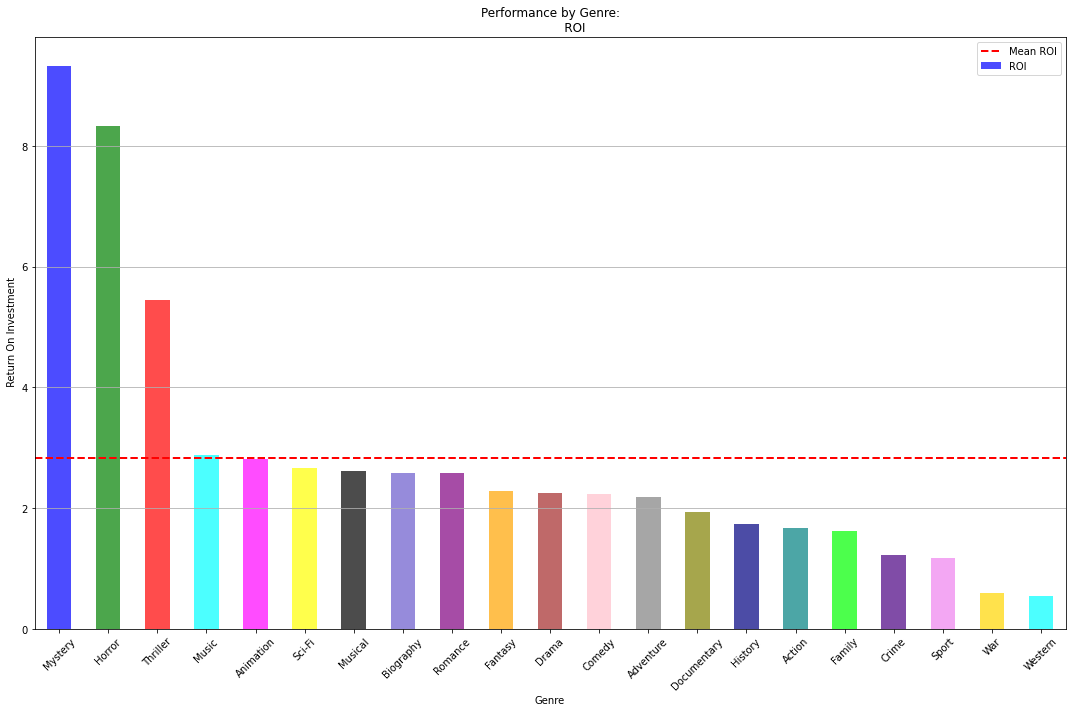

In [131]:
# we shall use a bar graph to plot this
# Plotting


plt.figure(figsize=(15, 10))


# Plotting with custom colors for each group
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'slateblue', 
    'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal', 
    'lime', 'indigo', 'violet', 'gold', 'aqua'
]


genre_performance_financial.sort_values(by = "ROI", inplace = True, ascending = False)
ax = genre_performance_financial['ROI'].plot(kind='bar', 
                                                       color=colors, alpha=0.7, label='ROI')

mean_ROI = df_movie_stats_and_gross['ROI'].mean()
ax.axhline(mean_ROI, color='red', linestyle='--', linewidth=2, label='Mean ROI')


plt.title("""Performance by Genre:
             ROI""")
plt.xlabel('Genre')
plt.ylabel(""" Return On Investment""")
plt.legend()

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Genre/bar_by_ROI.png')
plt.show()


## Worldwide Gross and Return on Investement by Genre

- **Musical, Animation, Adventure, Sci-Fi**, and **Fantasy** genres lead in worldwide gross and ROI, significantly above the mean performance
- **Documentary, Biography, Music, and Adult** genres show lower box office performance, falling below the mean line.

## (b) Audience Reception

In [132]:
genre_performance_rating

,release_year,runtime_minutes,popularity,release_month,average_rating
genres,,,,,
Action,2014.283413,101.880651,7.650334,6.776253,5.412666
Adult,2015.000000,120.000000,0.793000,9.000000,2.003759
Adventure,2014.365953,99.356486,9.326691,6.805301,5.819770
Animation,2014.406832,87.476341,8.327186,7.447205,6.226978
Biography,2014.215969,99.507227,4.513047,6.833770,6.993802
Comedy,2013.990588,94.592593,4.691547,6.628571,5.690394
Crime,2014.304462,100.503100,6.056521,6.955381,5.773848
Documentary,2014.170021,87.550926,1.589390,6.120329,7.061864
Drama,2014.131600,99.147849,4.432194,6.818800,5.991853


In [133]:
len(df_movie_stats_copy_exploded['genres'].unique())

25

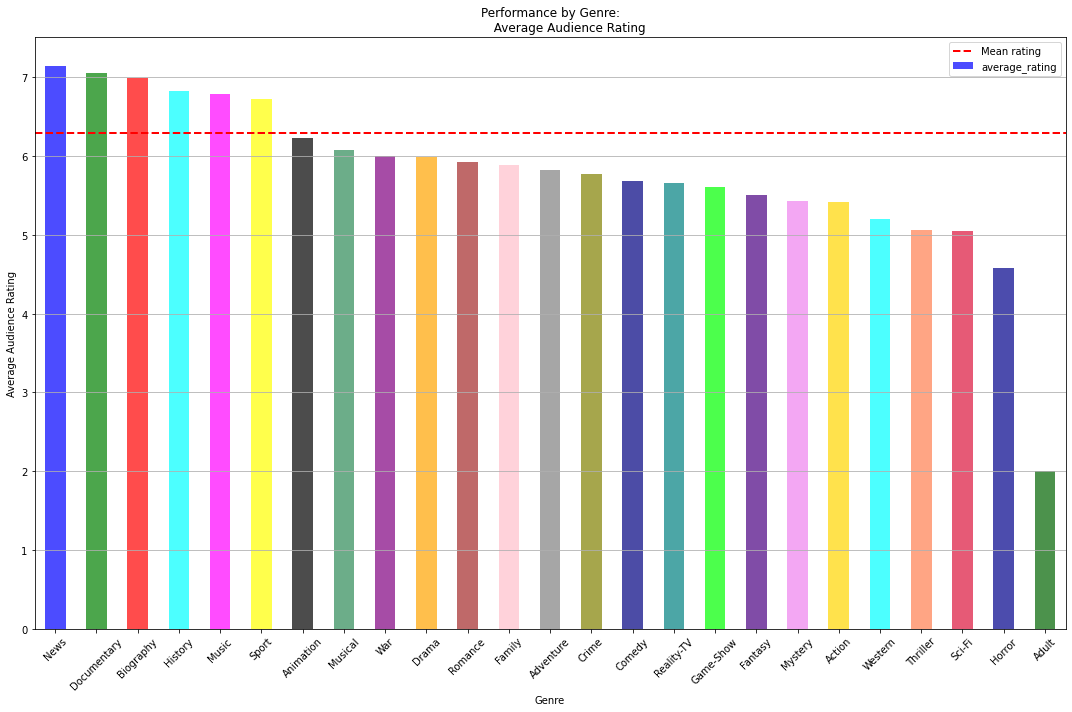

In [134]:
# Plotting with custom colors for each group
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'seagreen', 
    'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal', 
    'lime', 'indigo', 'violet', 'gold', 'aqua', 'coral', 'crimson', 'darkblue', 
    'darkgreen'
]

plt.figure(figsize=(15, 10))
genre_performance_rating.sort_values(by = "average_rating", inplace = True, ascending = False)
ax = genre_performance_rating['average_rating'].plot(kind='bar', color=colors, alpha=0.7,legend= False)
mean_rating = df_movie_stats_and_gross['average_rating'].mean()
ax.axhline(mean_rating, color='red', linestyle='--', linewidth=2, label='Mean rating',)

plt.title("""Performance by Genre:
          Average Audience Rating""")
plt.xlabel('Genre')
plt.ylabel("""Average Audience Rating""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Genre/bar_by_rating.png')
plt.show()

## Average Audience Rating by Genre
- Genres with the highest average audience ratings include **News, Documentary, Biography, History, Music, and Sport**, all scoring above 6.5.


- Genres such as **Action, Western, Thriller, Sci-Fi, Horror**, and **Adult** scored lower, with average ratings around or below the mean rating line (6).

## (c) Popularity and Engagement

In [135]:
genre_performance_rating

,release_year,runtime_minutes,popularity,release_month,average_rating
genres,,,,,
News,2013.359649,82.728070,1.300789,6.307018,7.150251
Documentary,2014.170021,87.550926,1.589390,6.120329,7.061864
Biography,2014.215969,99.507227,4.513047,6.833770,6.993802
History,2013.912195,97.286765,3.440241,6.758537,6.827641
Music,2014.162577,98.281734,3.659702,6.592025,6.790544
Sport,2014.120301,97.726923,3.268135,6.830827,6.730389
Animation,2014.406832,87.476341,8.327186,7.447205,6.226978
Musical,2013.818182,100.948454,3.247909,6.616162,6.075026
War,2014.346457,102.401575,4.193425,7.291339,6.000122


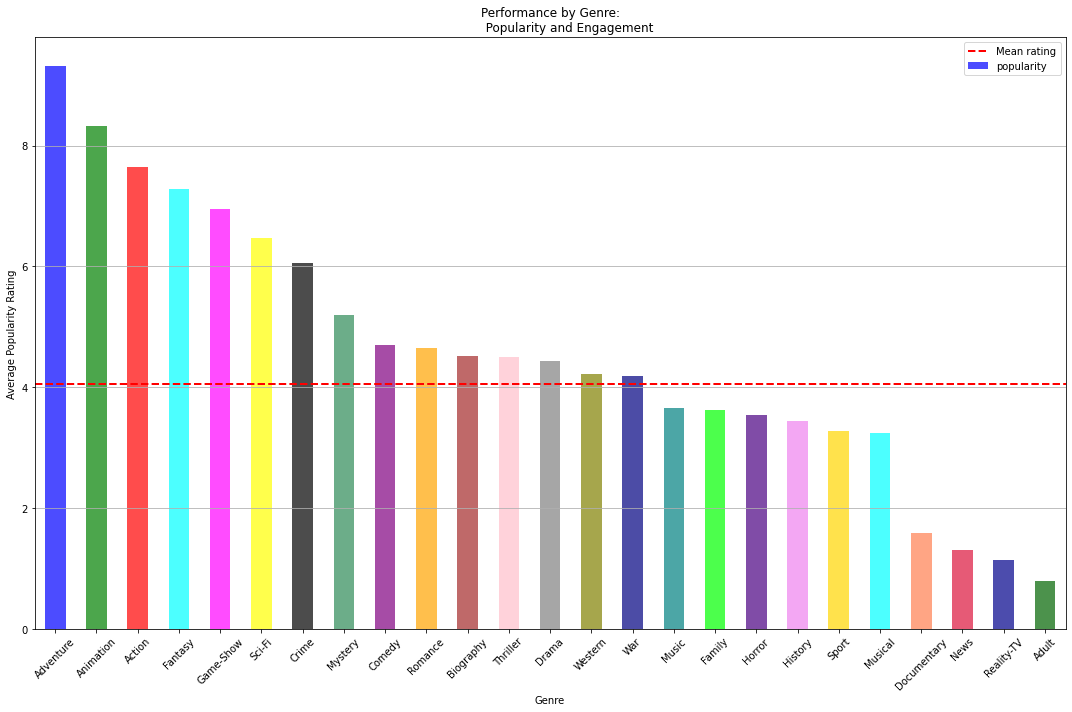

In [136]:
# Plotting with custom colors for each group
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'seagreen', 
    'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'navy', 'teal', 
    'lime', 'indigo', 'violet', 'gold', 'aqua', 'coral', 'crimson', 'darkblue', 
    'darkgreen'
]
plt.figure(figsize=(15, 10))
genre_performance_rating.sort_values(by = "popularity", inplace = True, ascending = False)
ax = genre_performance_rating['popularity'].plot(kind='bar', color=colors, alpha=0.7,legend= False)
mean_rating = df_movie_stats['popularity'].mean()
ax.axhline(mean_rating, color='red', linestyle='--', linewidth=2, label='Mean rating',)

plt.title("""Performance by Genre:
          Popularity and Engagement""")
plt.xlabel('Genre')
plt.ylabel("""Average Popularity Rating""")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('/home/leo/Documents/Moringa/phase_1/phase_1_project/plots/Genre/bar_by_popularity.png')
plt.show()


## Popularity and Engagement by Genre
- **Adventure, Animation, Action, Fantasy**, and **Sci-Fi** genres are highly popular and engage audiences effectively, with ratings well above the mean popularity rating.


- **Documentary, News, Reality-TV**, and **Adult** genres exhibit lower popularity and engagement, with ratings below the mean line.



# Analysis and Summary of performance based on Genre

- **Focus on Popular and High-Grossing Genres:** Given the high performance in audience engagement and box office returns, Microsoft should prioritize genres like **Adventure, Animation, Sci-Fi, Fantasy, and Action**. These genres not only attract large audiences but also generate substantial revenue.
- **Consider highly rated Genres:** While not the highest in box office returns, genres like **Documentary, Biography, History, and Music** receive high audience ratings. These genres can be explored for producing popular content and building a reputable brand.
- **Avoid Low-Performing Genres:** To maximize initial success, it's advisable to steer clear of genres such as **Adult, News, and Reality-TV**, which show lower ratings and popularity.

By leveraging these insights, Microsoft can strategically select genres that align with audience preferences and market trends, ensuring a successful entry into the movie production industry.


# Overall Summary and Recommendation

## Overall Summary
The analysis of movie performance reveals several key insights:

- **Runtime:** Movies with runtimes of 120+ minutes consistently perform best across worldwide gross, ROI, audience reception, and popularity. The 140-160 minute range excels in gross, while 160+ minute movies show the best ROI. Movies under 100 minutes, especially in the 60-80 minute range, generally perform the worst.

- **Release Month:** May, June, and December are the most favorable months for releasing movies, achieving high financial performance and audience ratings. February, August, and September show the poorest performance, both financially and in audience reception.

- **Genre:** Genres like **Adventure, Animation, Sci-Fi, Fantasy, and Action** are top performers in audience engagement and box office returns. **Documentary, Biography, History, and Music** genres, while not the highest in gross, receive high audience ratings. **Adult, News, and Reality-TV** genres perform poorly in both ratings and popularity.


## Recommendation to Microsoft
To ensure a successful entry into the movie production industry, Microsoft should:

- **Focus on Optimal Runtimes:** Prioritize movies with runtimes of 120+ minutes, with a special emphasis on the 140-160 minute range for maximum box office returns and audience engagement. Longer movies tend to be more immersive, often leading to better audience reception and higher grosses.

- **Strategic Release Timing:** Schedule major movie releases in May, June, or December to capitalize on high financial performance and audience ratings. These months coincide with the Winter and Summer seasons of the Northern hemisphere and show increased audience turnout and higher box office revenues. Conversely, avoid releasing movies in February, August, and September to minimize financial risk and ensure better audience engagement.

- **Invest in High-Performing Genres:** Concentrate on popular and high-grossing genres such as **Adventure, Animation, Sci-Fi, Fantasy, and Action**. These genres have a proven track record of attracting large audiences and generating significant revenue. Additionally, produce films in highly rated genres like **Documentary, Biography, History, and Music** to build a strong, reputable brand with critically acclaimed content. These genres, while not always the highest grossing, can contribute to the studio’s prestige and critical success.

- **Avoid Low-Performing Genres:** Minimize investment in **Adult, News, and Reality-TV** genres due to their lower audience ratings and popularity. These genres have shown limited appeal and are less likely to contribute to the studio's financial success or reputation.

By following these recommendations, Microsoft can strategically align their movie production with market trends and audience preferences. This approach ensures a strong and successful entry into the film industry, balancing financial success with critical acclaim and audience engagement.
